In [1]:
from os.path import join
from pymatgen.core import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymacy.neb.pathfinder import PathFinder
from pymacy.neb.io import write_neb_inputs, write_end_points_inputs

source_dir = "./"

In [2]:
import pandas as pds
#import cmocean
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### (1) Negligible impact of Light/tight basis or just making the supercell. But, considerable impact while considering the S-Cl exchange in the number of Li-diffusion paths, (2) PBESol fails to predict the S-Cl site disorder in LPSCl. Overall, volume prediction by PBEsol and PBE+TS is similar. 

# With exchange

In [40]:
s = Structure.from_file(join(source_dir, "../rdf/lp_ge_si_exchanged_si_hseo6_mbdnl_tight_unit.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=7)
len(paths)

765

In [38]:
s = Structure.from_file(join(source_dir, "../rdf/lpsclbr_with_exchange_hse06_mbd_nl_392_atom.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=7)
len(paths)

643

In [65]:
s = Structure.from_file(join(source_dir, "../rdf/lpsclbr_with_exchange_hse06_mbd_nl_light.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

208

In [35]:
#s = Structure.from_file(join(source_dir, "../rdf/lpsi_s_i_exchanged_hse_06_mbd_nl.vasp"))
s = Structure.from_file(join(source_dir, "../rdf/lpsi_s_i_exchanged_hse_06_mbd_nl_416.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=7)
len(paths)

761

In [32]:
s = Structure.from_file(join(source_dir, "../rdf/lpscl_hse_06_mbdnl_s_cl_exchanged_unitcell.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=7)
len(paths)

739

In [33]:
s = Structure.from_file(join(source_dir, "../rdf/lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=7)
len(paths)

838

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


37 2.580855144109216
38 2.5808551441092167
750 2.6084181836080673
418 2.6988056165146355
428 2.722236542970497
429 2.7222365429704984
271 2.774506367199421
272 2.7745063671994217
581 2.799936963891196
582 2.7999369638911977
149 2.8315396649578597
150 2.83153966495786
52 2.8565605861688677
740 2.9121161993811002
741 2.9121161993811024
419 2.9133152027972127
420 2.913315202797213
87 2.9479414352907494
88 2.9479414352907507
20 2.953521496141618
21 2.9535214961416187
67 2.9927281027376296
68 2.99272810273763
645 3.0165757996820344
477 3.036998739944841
478 3.0369987399448415
682 3.0399555330144903
599 3.047706344399848
600 3.047706344399849
369 3.053520103902785
370 3.0535201039027853
58 3.076210710193898
197 3.087729634946225
321 3.1004567820499074
514 3.1110052890261084
515 3.1110052890261106
673 3.1112329327377233
618 3.1579923218975954
619 3.1579923218975963
10 3.163666875202252
220 3.175738483107624
221 3.1757384831076254
73 3.204662958103409
74 3.2046629581034107
230 3.20496952354568

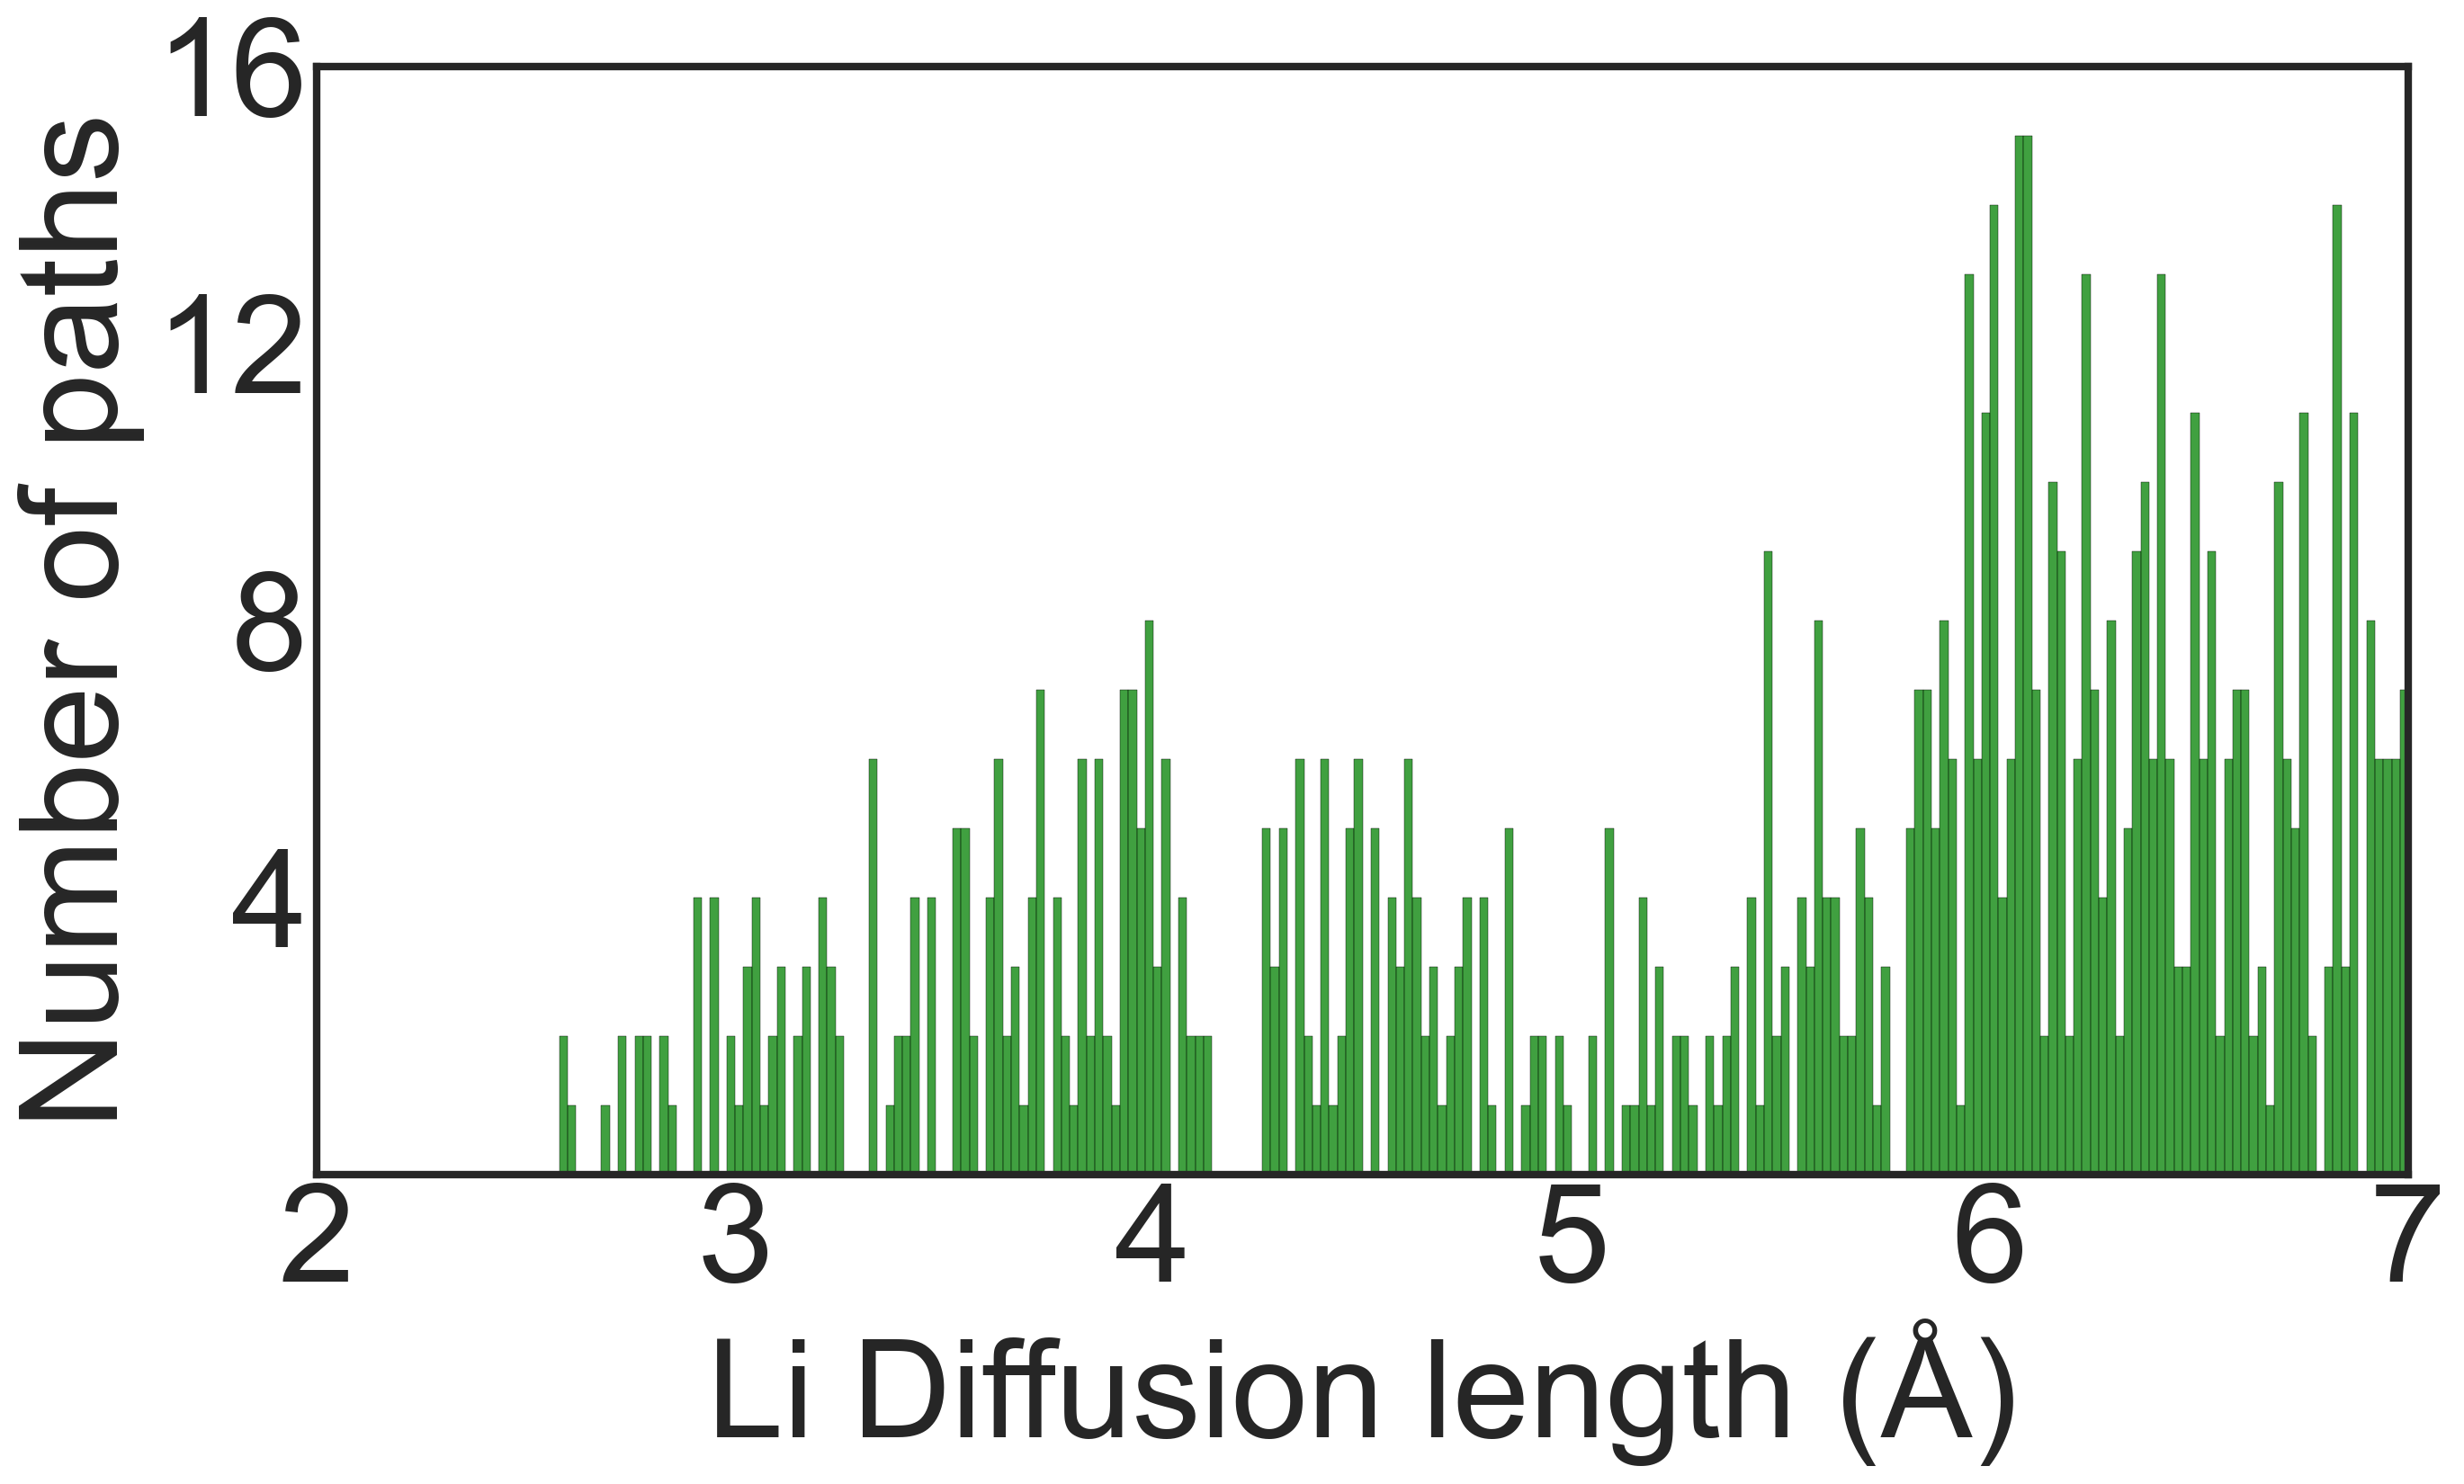

In [41]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02, stat="count",edgecolor = "black",color = 'green')
#sns.histplot(data=dff, binwidth=0.02)
#sns.distplot(df, bins=0.02)
#common_norm=True
ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(15,8)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)
#plt.ylim(0, 0.1)
plt.xlim(2.0, 7)
plt.ylim(0, 16)
plt.yticks([4,8,12, 16],fontsize=55)
plt.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0],fontsize=55)
plt.xlabel('Li Diffusion length (Å)', fontsize=55)
plt.ylabel('Number of paths', fontsize=55)
plt.savefig('7_angs_noc_lp_ge_si_exchanged_si_hseo6_mbdnl_tight_unit.png', dpi=300, format="png",bbox_inches='tight')

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


146 2.552286322346613
147 2.5522863223466157
235 2.564718815485455
236 2.5647188154854557
199 2.6354612324276885
200 2.6354612324276894
114 2.655899042288775
115 2.6558990422887763
261 2.7626393536232836
262 2.7626393536232845
269 2.776606556166802
270 2.776606556166805
251 2.876427819834509
252 2.8764278198345097
249 2.8877578585496146
250 2.8877578585496173
20 2.915531226373335
21 2.915531226373336
204 2.9349887624651183
205 2.9349887624651205
77 2.9647653497772843
78 2.964765349777285
125 2.9950005751744833
126 2.995000575174484
171 3.0382412670249797
9 3.0631889598816255
10 3.0631889598816264
153 3.0671478733061126
154 3.0671478733061157
61 3.072093236411405
3 3.0774758634607338
4 3.0774758634607347
229 3.080272431219056
257 3.082235238911827
258 3.0822352389118284
271 3.103975122106553
140 3.1271387285000345
141 3.127138728500035
265 3.130339187148651
266 3.1303391871486554
118 3.135401966153958
119 3.1354019661539594
93 3.136150609114614
94 3.136150609114616
218 3.153041896349269

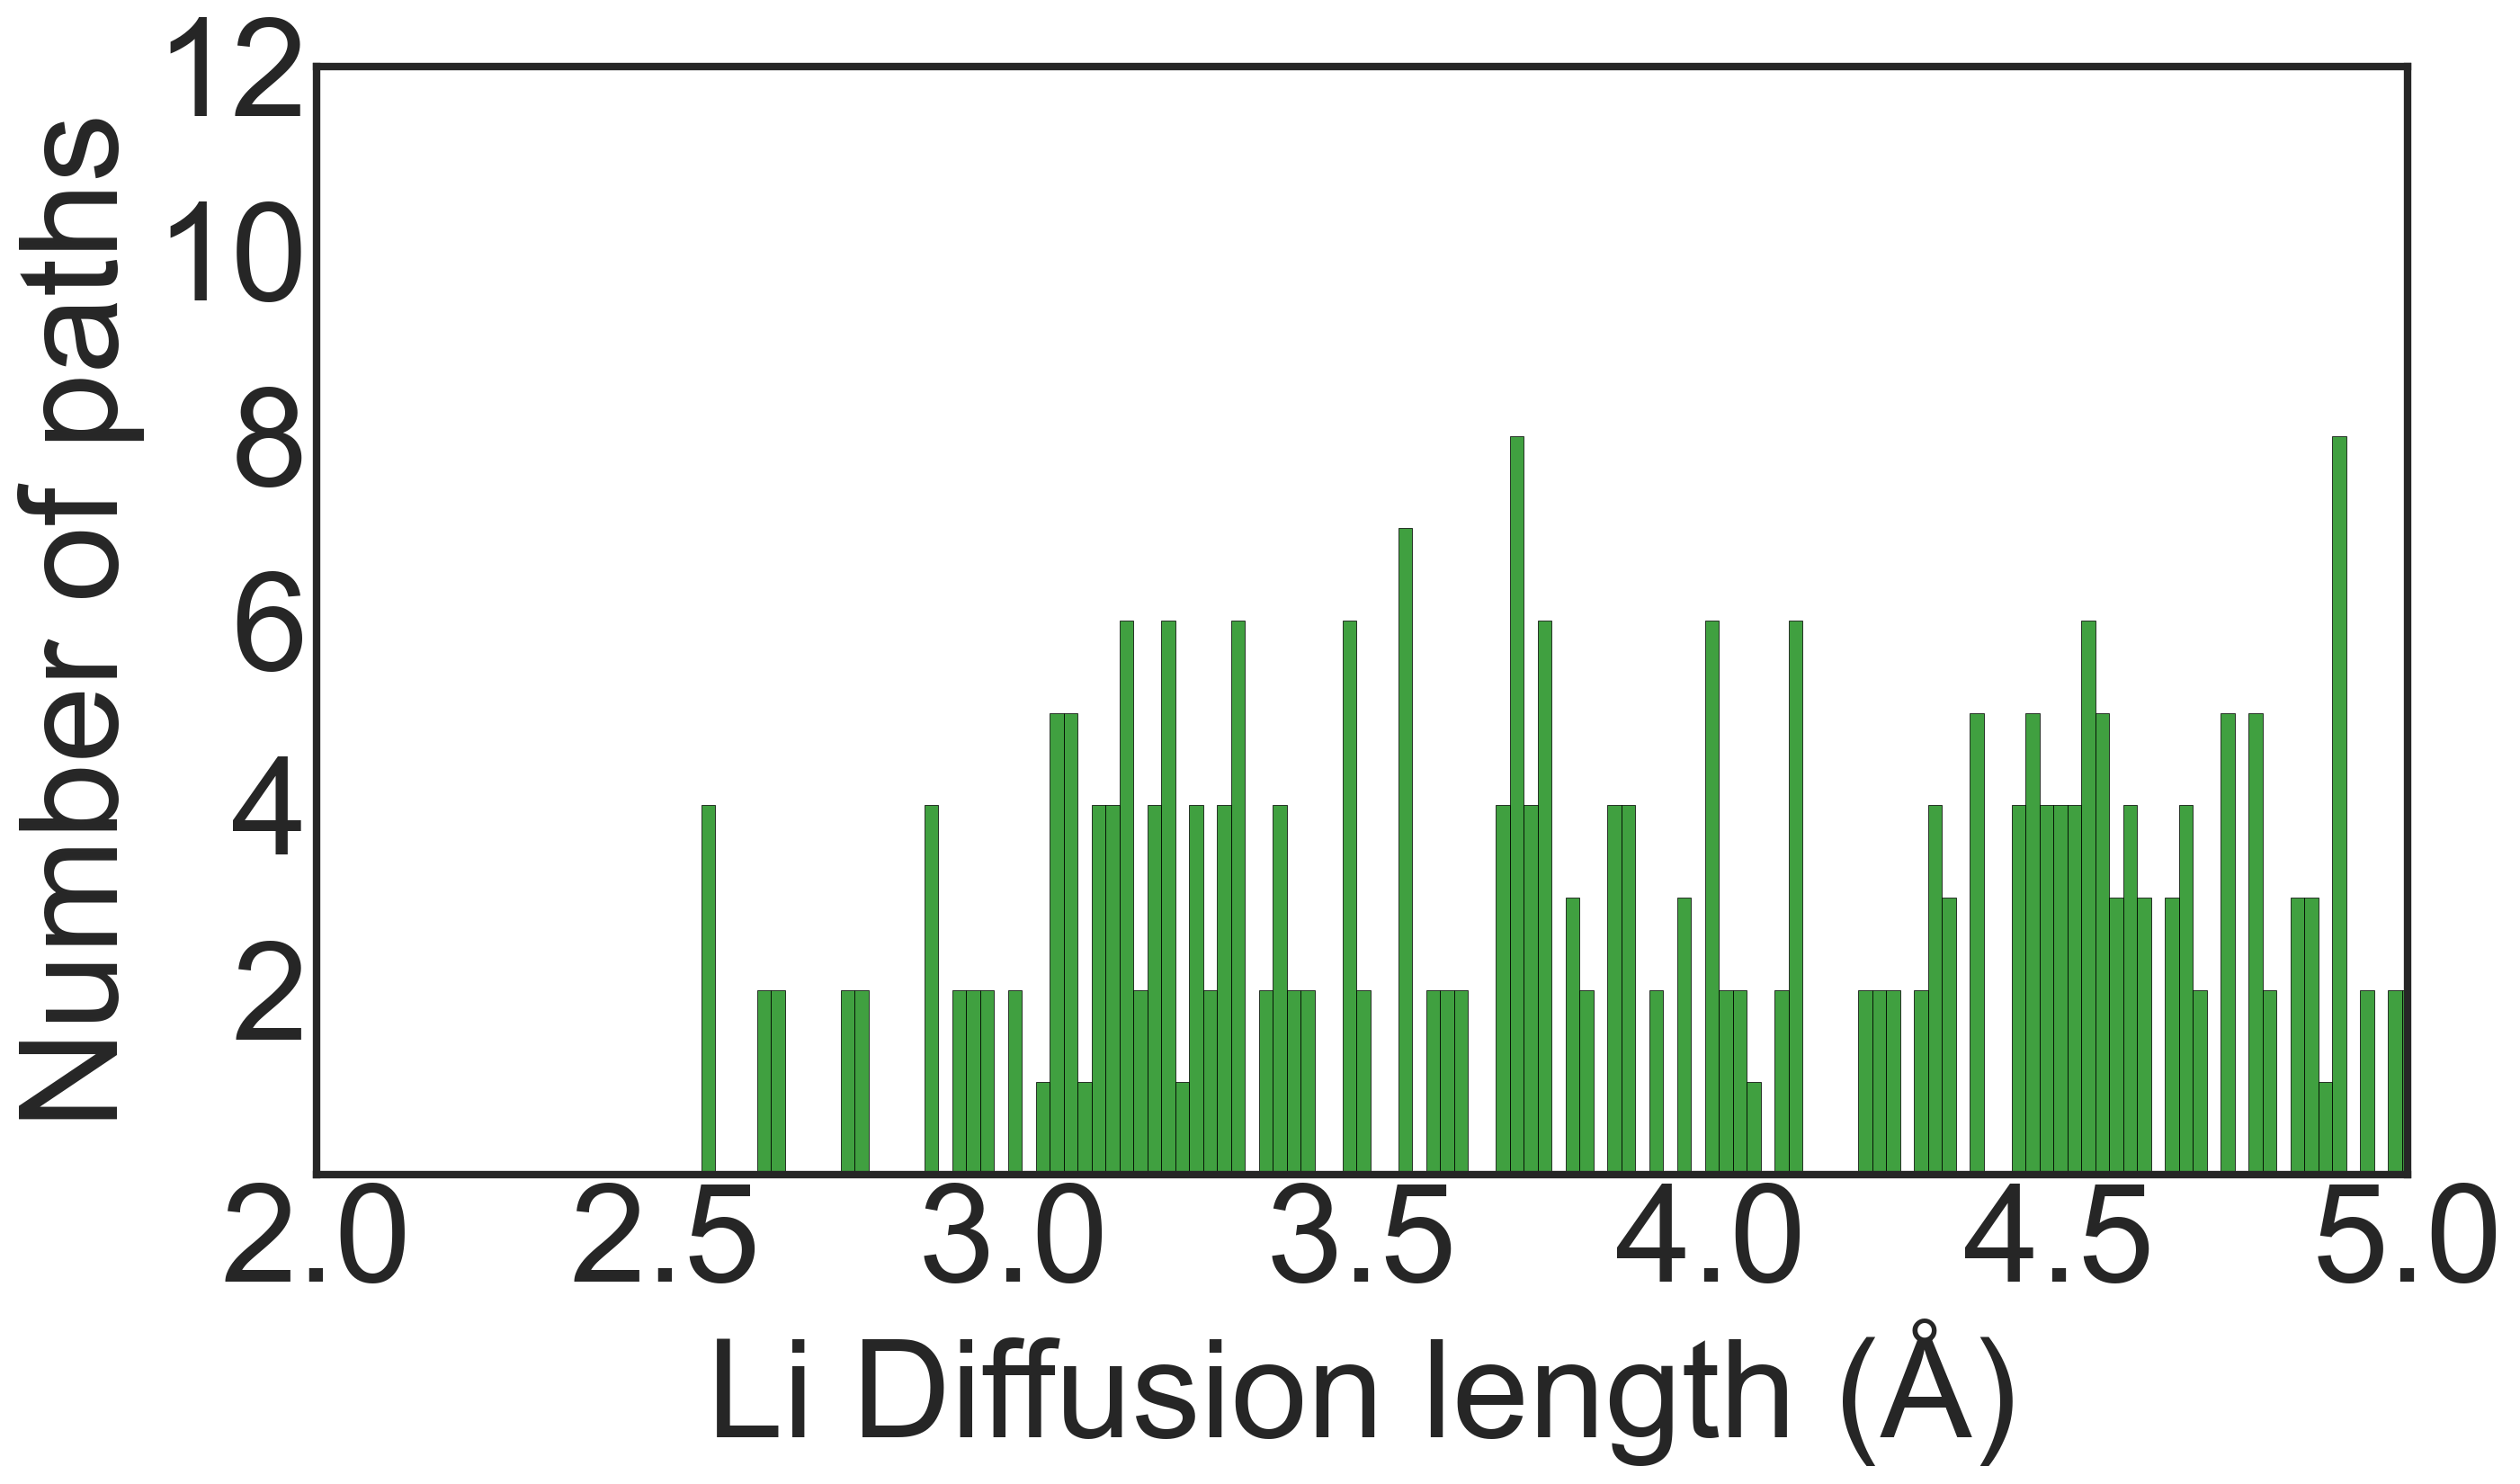

In [70]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02, stat="count",edgecolor = "black",color = 'green')
#sns.histplot(data=dff, binwidth=0.02)
#sns.distplot(df, bins=0.02)
#common_norm=True
ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(15,8)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)
#plt.ylim(0, 0.1)
plt.xlim(2.0, 5)
plt.yticks([2, 4, 6, 8,10,12],fontsize=55)
plt.xticks([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],fontsize=55)
plt.xlabel('Li Diffusion length (Å)', fontsize=55)
plt.ylabel('Number of paths', fontsize=55)
plt.savefig('noc_lpscl_hse_06_mbdnl_s_cl_exchanged_unitcell.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)


# Without exchange

In [71]:
s = Structure.from_file(join(source_dir, "../rdf/lp_ge_si_hseo6_mbdnl_light_424.POSCAR.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

308

In [55]:
s = Structure.from_file(join(source_dir, "../rdf/lp_ge_si_hseo6_mbdnl_tight_unit.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=7)
len(paths)

773

In [76]:
s = Structure.from_file(join(source_dir, "../rdf/hse06_mbd_nl_lpsclbr_light_unit.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=7)
len(paths)

606

In [51]:
s = Structure.from_file(join(source_dir, "../rdf/lpscl_hse06_mbd_nl_408_atom.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=7)
len(paths)

204

In [79]:
s = Structure.from_file(join(source_dir, "lpscl_conventional_mp_hse06_light.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

66

In [53]:
s = Structure.from_file(join(source_dir, "../rdf/lpsi_hse_06_mbd_nl_tight.in.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=7)
len(paths)

173

In [45]:
s = Structure.from_file(join(source_dir, "lpsi_hse_06_mbd_nl_mbdnl.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

68

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


313 2.833215710457379
314 2.83321571045738
222 2.848019429891946
223 2.848019429891947
362 2.849930386146851
363 2.8499303861468523
358 2.893882720061927
582 2.9056665350784567
583 2.905666535078458
281 2.940978792149029
282 2.9409787921490302
84 2.958232587266992
85 2.9582325872669943
536 3.062243417045187
178 3.128023828552207
179 3.128023828552209
194 3.1306501440586207
195 3.1306501440586225
584 3.1960581501829255
585 3.196058150182926
596 3.1977100035615265
592 3.1977101382205477
360 3.2049372195668155
468 3.2324356253525464
469 3.232435625352547
191 3.2828412587911937
192 3.2828412587911946
137 3.287949005277878
156 3.28794959541673
560 3.3052308036716354
561 3.3052308036716385
27 3.317889322936175
197 3.3600166072738444
198 3.3600166072738458
593 3.380732300009218
594 3.3807323000092206
375 3.407505456445081
402 3.4075059603537334
273 3.4239739415818273
274 3.4239739415818278
331 3.4477361368269364
332 3.4477361368269386
89 3.450085072701006
106 3.4500860353714744
458 3.45227057

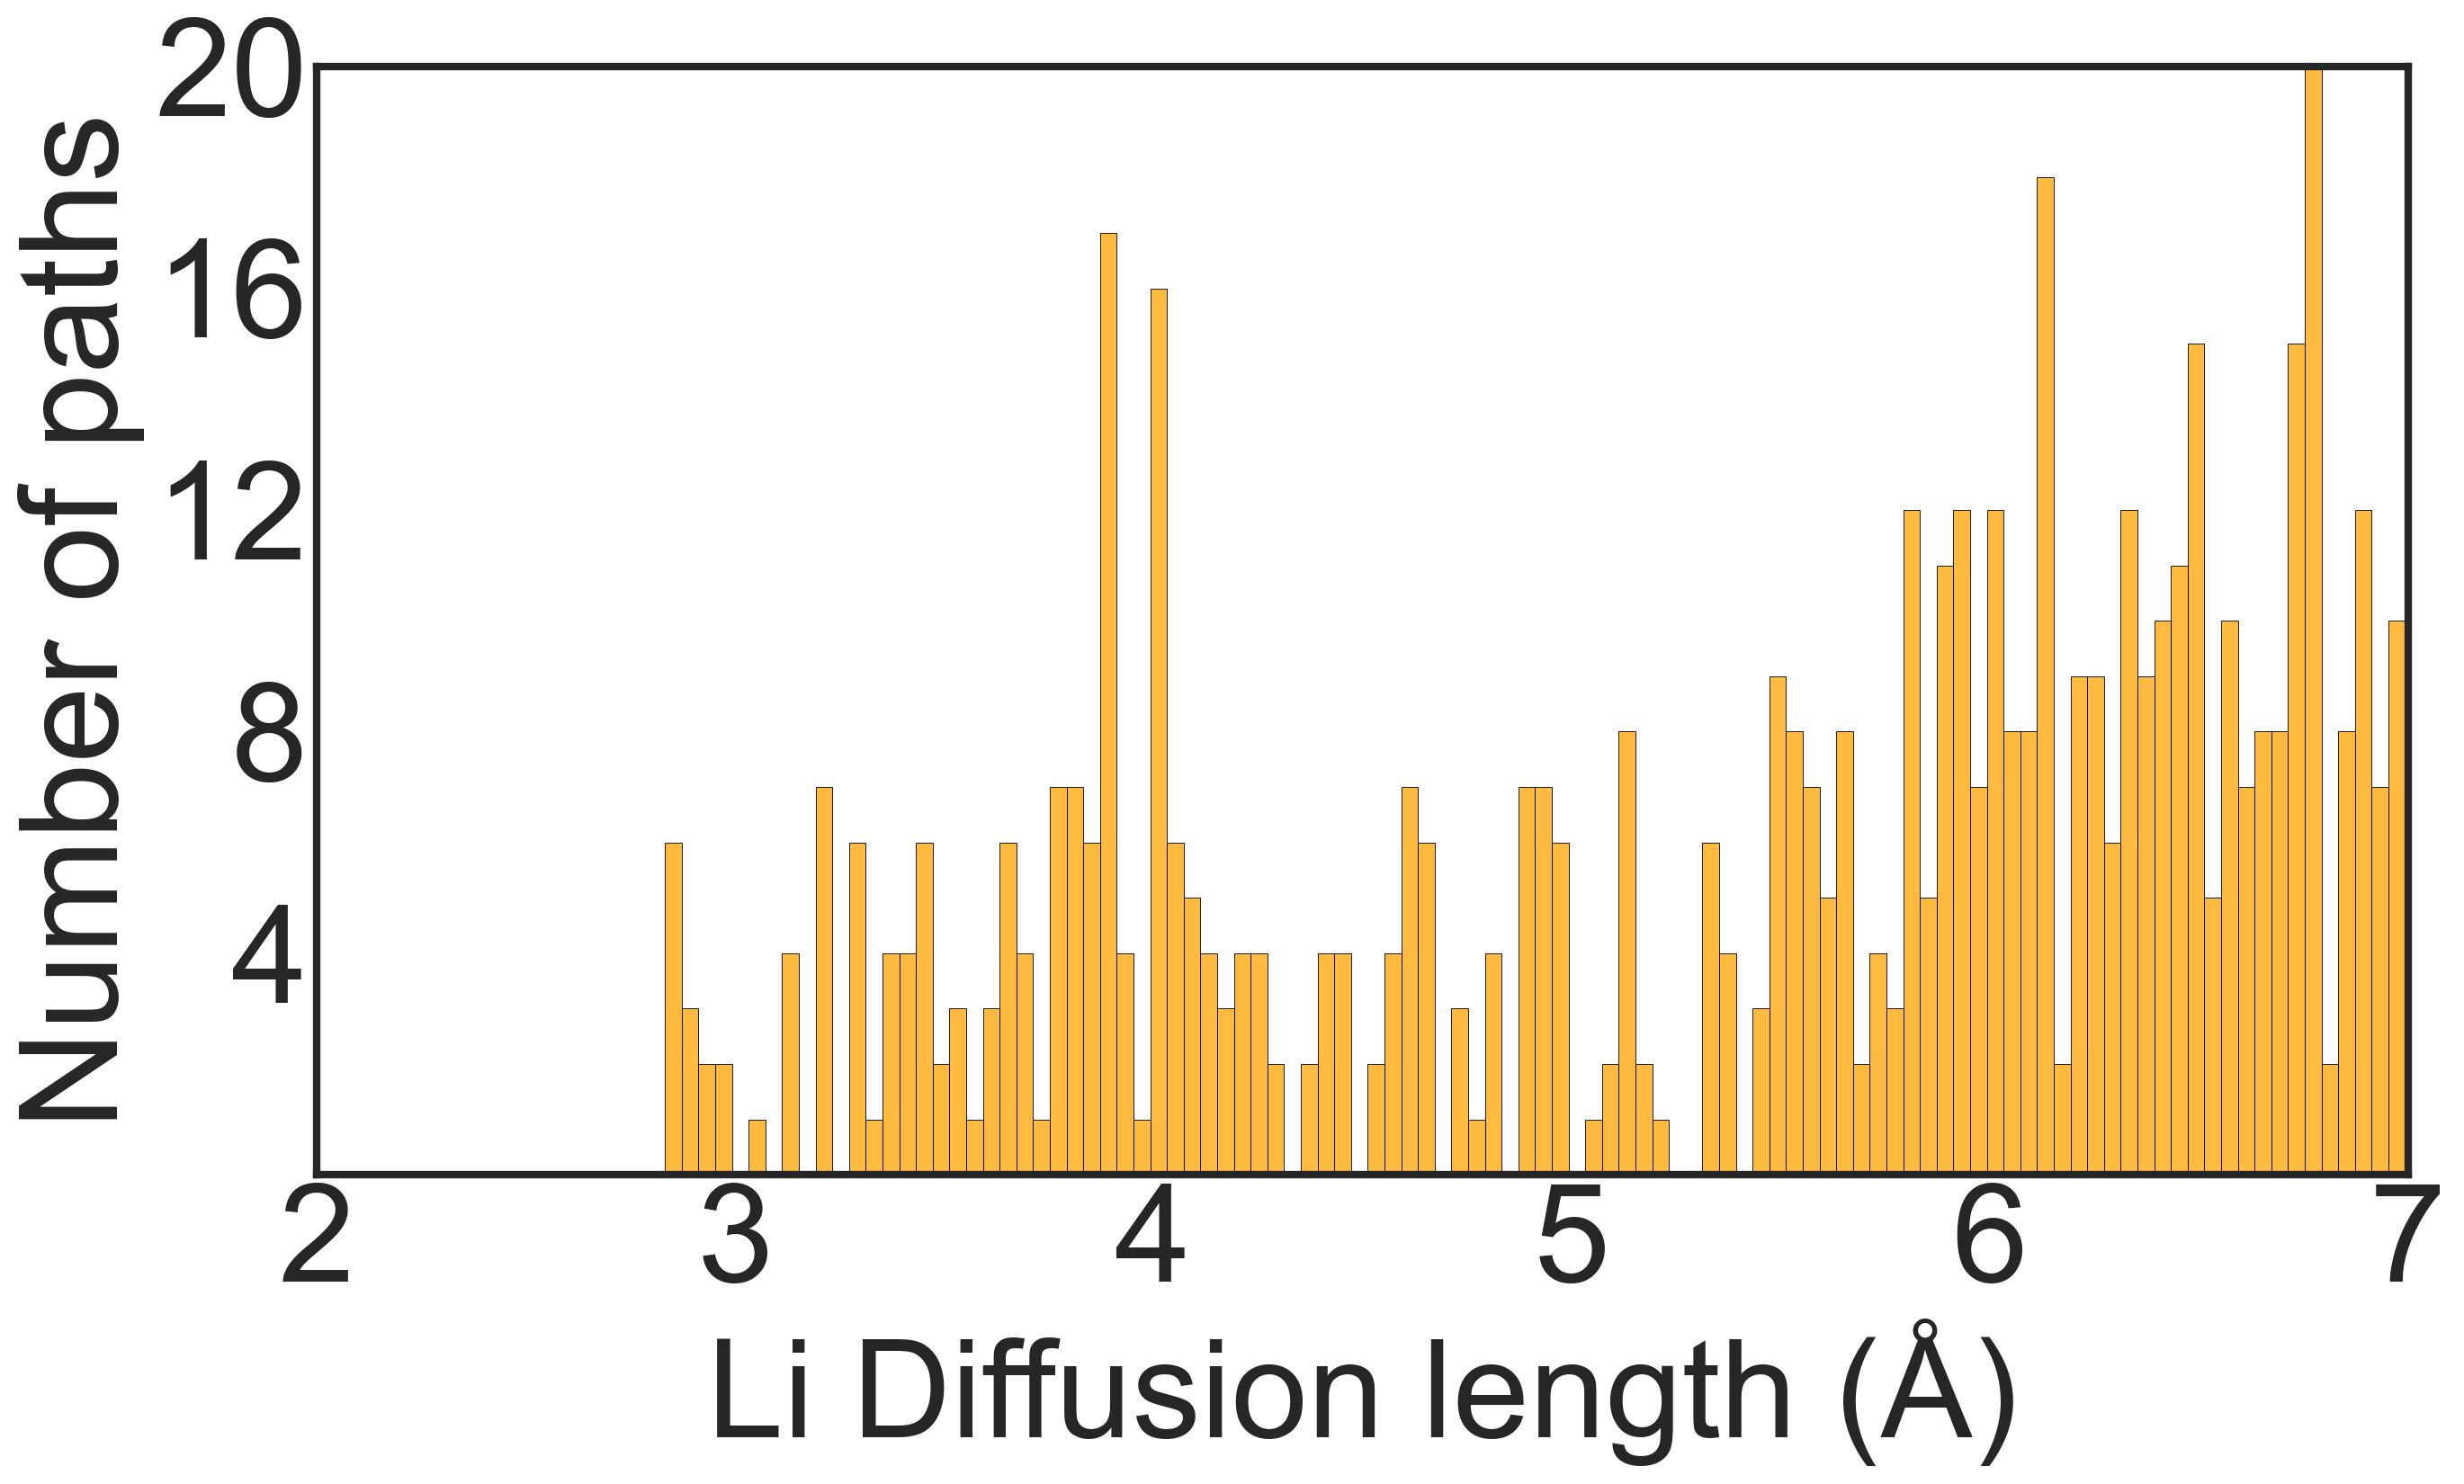

In [77]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.04, stat="count",edgecolor = "black",color = 'orange')
#sns.histplot(data=dff, binwidth=0.02)
#sns.distplot(df, bins=0.02)
#common_norm=True
ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(15,8)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)
#plt.ylim(0, 0.1)
plt.ylim(0, 20)
plt.xlim(2.0, 7)
plt.yticks([4, 8, 12,16,20],fontsize=55)
plt.xticks([2.0, 3.0, 4, 5, 6, 7],fontsize=55)
plt.xlabel('Li Diffusion length (Å)', fontsize=55)
plt.ylabel('Number of paths', fontsize=55)
plt.savefig('7_angs_noc_hse06_mbd_nl_lpsclbr_light_unit.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)

313 2.833215710457379
314 2.83321571045738
222 2.848019429891946
223 2.848019429891947
362 2.849930386146851
363 2.8499303861468523
358 2.893882720061927
582 2.9056665350784567
583 2.905666535078458
281 2.940978792149029
282 2.9409787921490302
84 2.958232587266992
85 2.9582325872669943
536 3.062243417045187
178 3.128023828552207
179 3.128023828552209
194 3.1306501440586207
195 3.1306501440586225
584 3.1960581501829255
585 3.196058150182926
596 3.1977100035615265
592 3.1977101382205477
360 3.2049372195668155
468 3.2324356253525464
469 3.232435625352547
191 3.2828412587911937
192 3.2828412587911946
137 3.287949005277878
156 3.28794959541673
560 3.3052308036716354
561 3.3052308036716385
27 3.317889322936175
197 3.3600166072738444
198 3.3600166072738458
593 3.380732300009218
594 3.3807323000092206
375 3.407505456445081
402 3.4075059603537334
273 3.4239739415818273
274 3.4239739415818278
331 3.4477361368269364
332 3.4477361368269386
89 3.450085072701006
106 3.4500860353714744
458 3.45227057

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


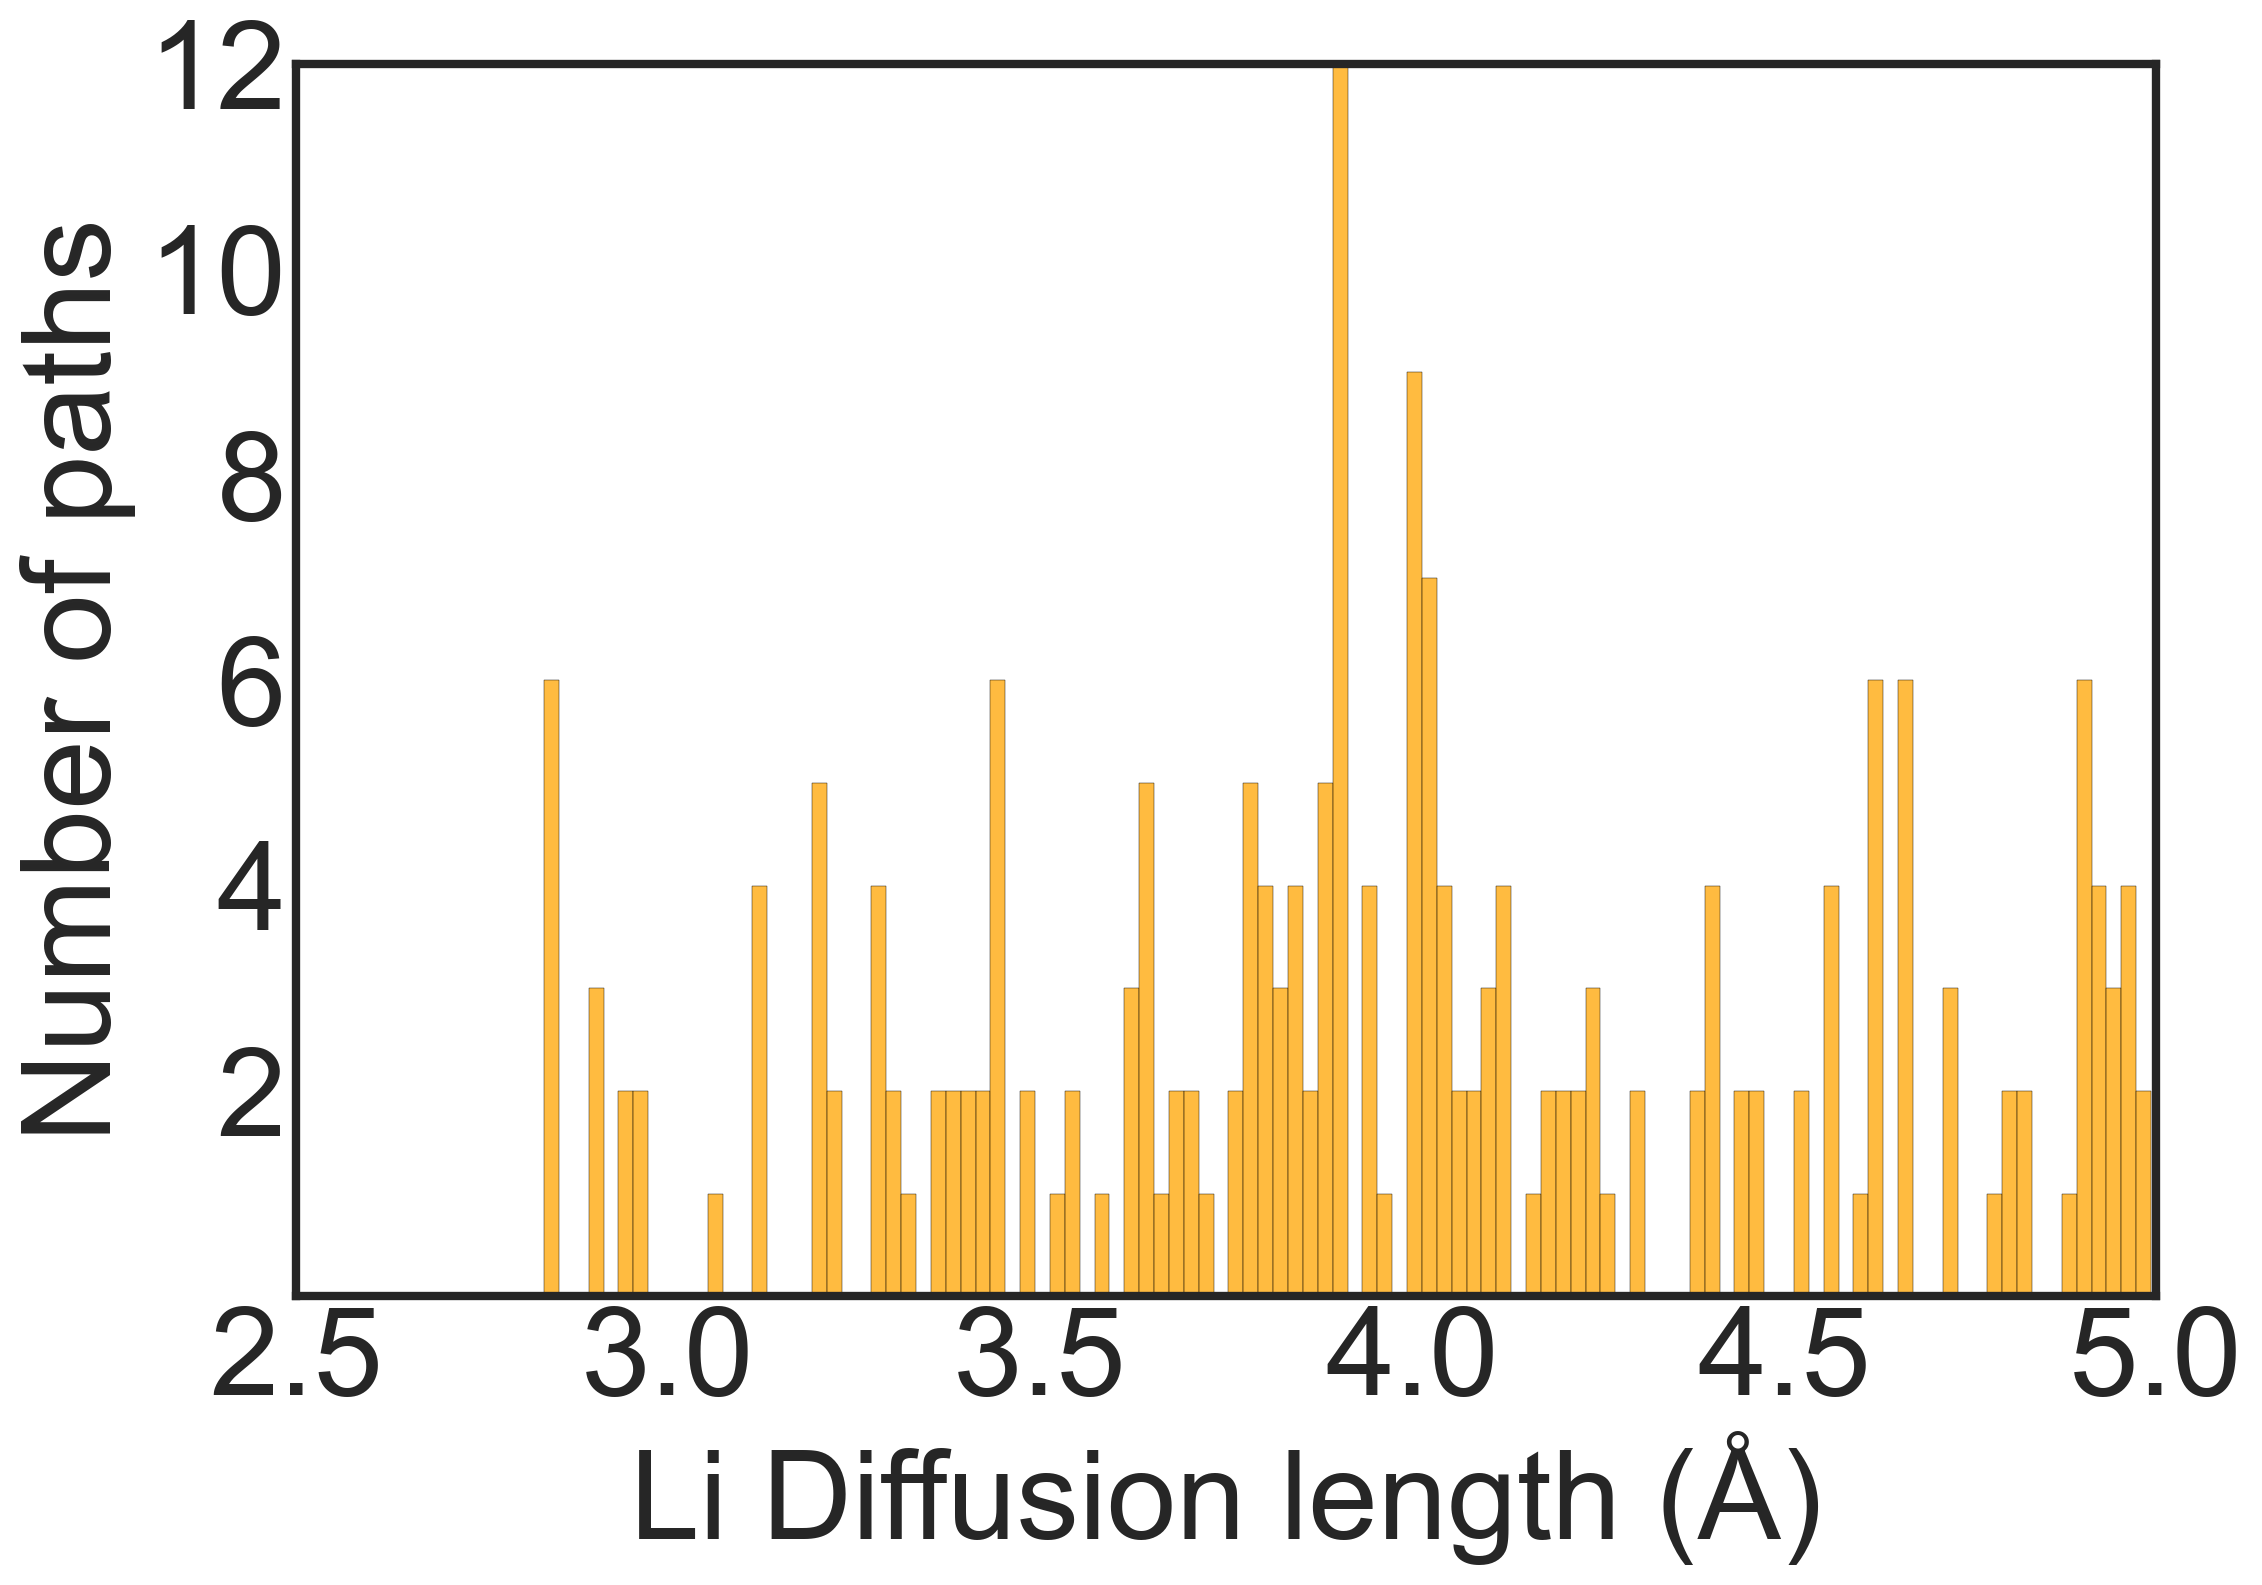

In [70]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02, stat="count",edgecolor = "black",color = 'orange')
#sns.histplot(data=dff, binwidth=0.02)
#sns.distplot(df, bins=0.02)
#common_norm=True
ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)
plt.ylim(0, 12)
plt.xlim(2.5, 5)
plt.yticks([2, 4, 6, 8,10,12],fontsize=45)
plt.xticks([2.5, 3.0, 3.5, 4.0, 4.5, 5.0],fontsize=45)
plt.xlabel('Li Diffusion length (Å)', fontsize=45)
plt.ylabel('Number of paths', fontsize=45)
plt.savefig('noc_hse06_mbd_nl_lpsclbr_light_unit.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)

273

297

206

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


94 2.8513411188311375
95 2.851341118831138
175 2.858035539113664
90 2.8580361468390096
69 2.8636602449200343
70 2.863660244920035
112 2.9278673594863767
113 2.9278673594863784
182 2.94800404835891
183 2.9480040483589107
108 2.952758500491418
109 2.9527585004914223
196 3.02519999550804
23 3.0252003127861555
61 3.0942630496719707
62 3.094263049671972
110 3.146450997414449
111 3.14645099741445
169 3.1556067169511857
170 3.1556067169511866
184 3.201434464061521
185 3.201434464061522
60 3.2557025759297247
52 3.269947869060496
53 3.2699478690604984
174 3.298287546705309
193 3.310582643460454
197 3.3105832833711273
145 3.330893530604015
146 3.330893530604016
63 3.3318971722349002
64 3.331897172234901
187 3.370501967661981
38 3.370502107738981
66 3.3803388359669215
67 3.3803388359669224
168 3.4012580687819707
173 3.4012583633998856
86 3.4382743139345844
12 3.440318207888035
151 3.4403183102201127
194 3.4612383461697815
131 3.480328802041865
132 3.480328802041866
144 3.4861522714895674
204 3.48

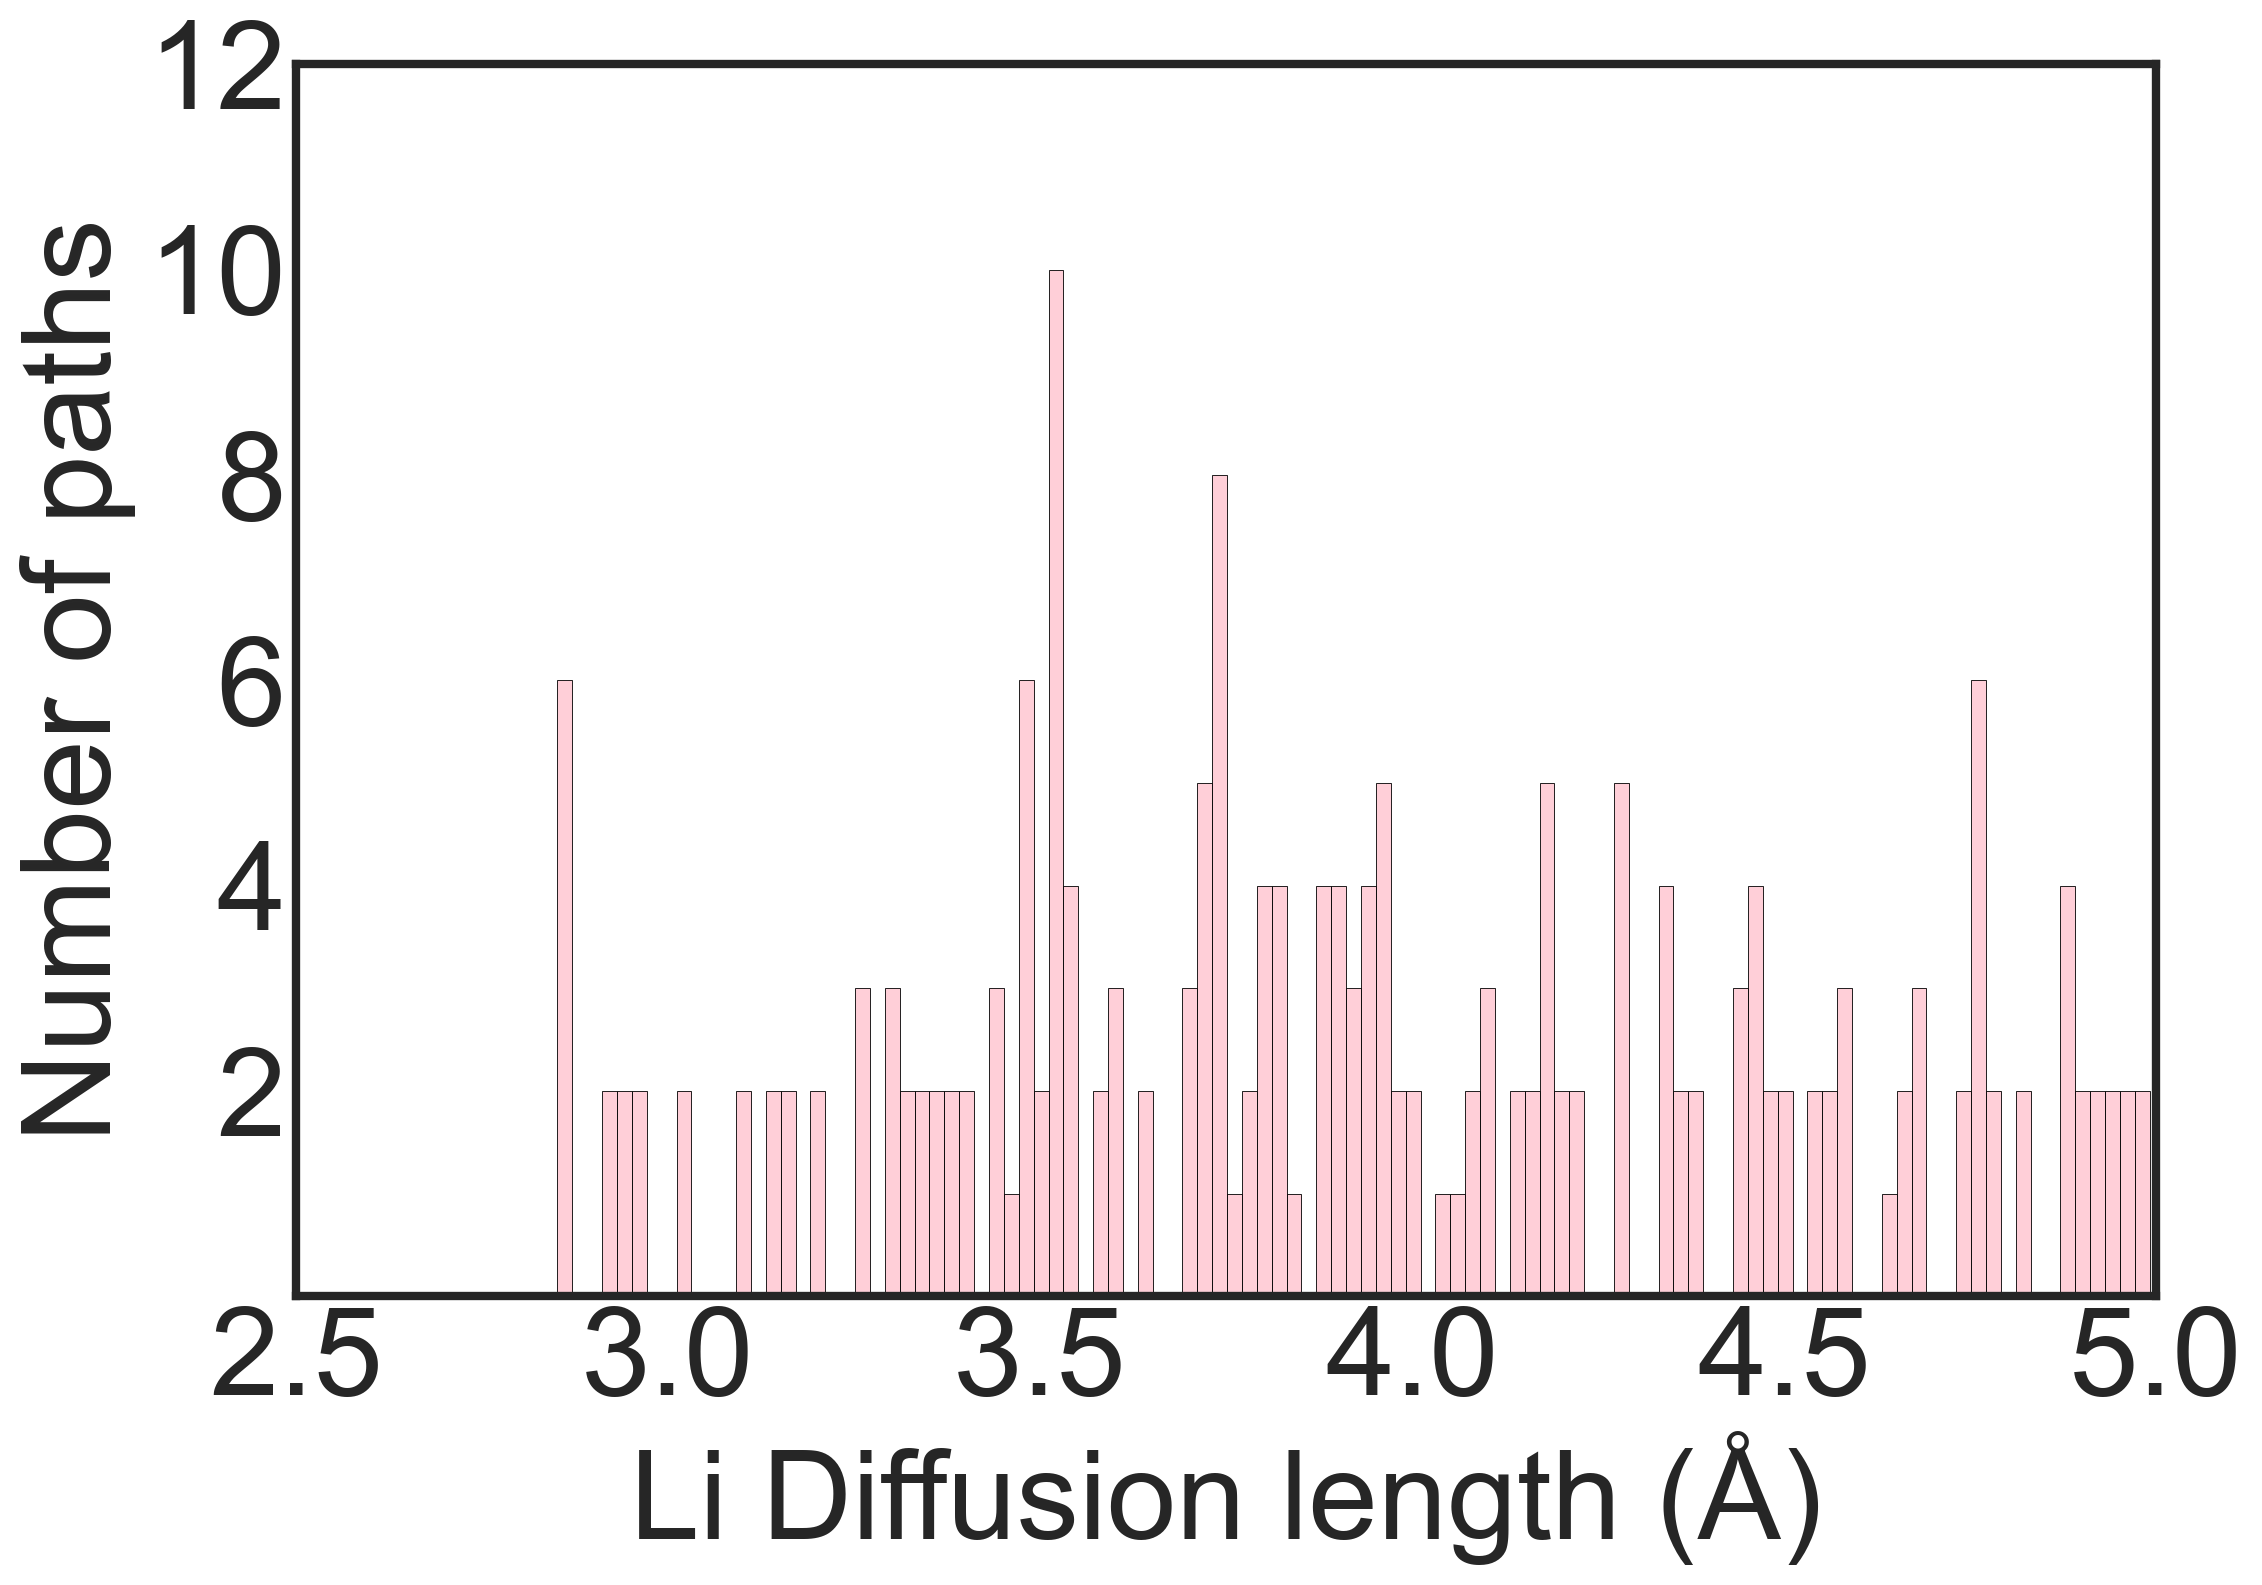

In [6]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02, stat="count",edgecolor = "black",color = 'pink')
#sns.histplot(data=dff, binwidth=0.02)
#sns.distplot(df, bins=0.02)
#common_norm=True
ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)
#plt.ylim(0, 0.1)
plt.xlim(2.5, 5)
plt.yticks([2, 4, 6, 8,10,12],fontsize=45)
plt.xticks([2.5, 3.0, 3.5, 4.0, 4.5, 5.0],fontsize=45)
plt.xlabel('Li Diffusion length (Å)', fontsize=45)
plt.ylabel('Number of paths', fontsize=45)
plt.savefig('noc_lpsclbr_with_exchange_hse06_mbd_nl_392_atom.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)

# LPSCl

64

66

In [26]:
s = Structure.from_file(join(source_dir, "lpscl_conventional_mp_hse06_ts_light.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

152

In [27]:
s = Structure.from_file(join(source_dir, "lpscl_conventional_mp_hse06_mbd_nl.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

64

In [28]:
s = Structure.from_file(join(source_dir, "../rdf/lpscl_conventional_mp_hse06_mbd_nl_tight.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

67

In [29]:
s = Structure.from_file(join(source_dir, "../rdf/lpscl_hse_06_mbdnl_s_cl_exchanged_unitcell.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

273

308

209

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


117 2.833215710457379
118 2.83321571045738
84 2.848019429891946
85 2.848019429891947
135 2.849930386146851
136 2.8499303861468523
132 2.893882720061927
195 2.9056665350784567
196 2.905666535078458
109 2.940978792149029
110 2.9409787921490302
33 2.958232587266992
34 2.9582325872669943
188 3.062243417045187
67 3.128023828552207
68 3.128023828552209
77 3.1306501440586207
78 3.1306501440586225
197 3.1960581501829255
198 3.196058150182926
206 3.1977100035615265
203 3.1977101382205477
133 3.2049372195668155
168 3.2324356253525464
169 3.232435625352547
75 3.2828412587911937
76 3.2828412587911946
51 3.287949005277878
60 3.28794959541673
190 3.3052308036716354
191 3.3052308036716385
14 3.317889322936175
79 3.3600166072738444
80 3.3600166072738458
204 3.380732300009218
205 3.3807323000092206
140 3.407505456445081
148 3.4075059603537334
105 3.4239739415818273
106 3.4239739415818278
125 3.4477361368269364
126 3.4477361368269386
35 3.450085072701006
41 3.4500860353714744
164 3.452270579006518
165 3

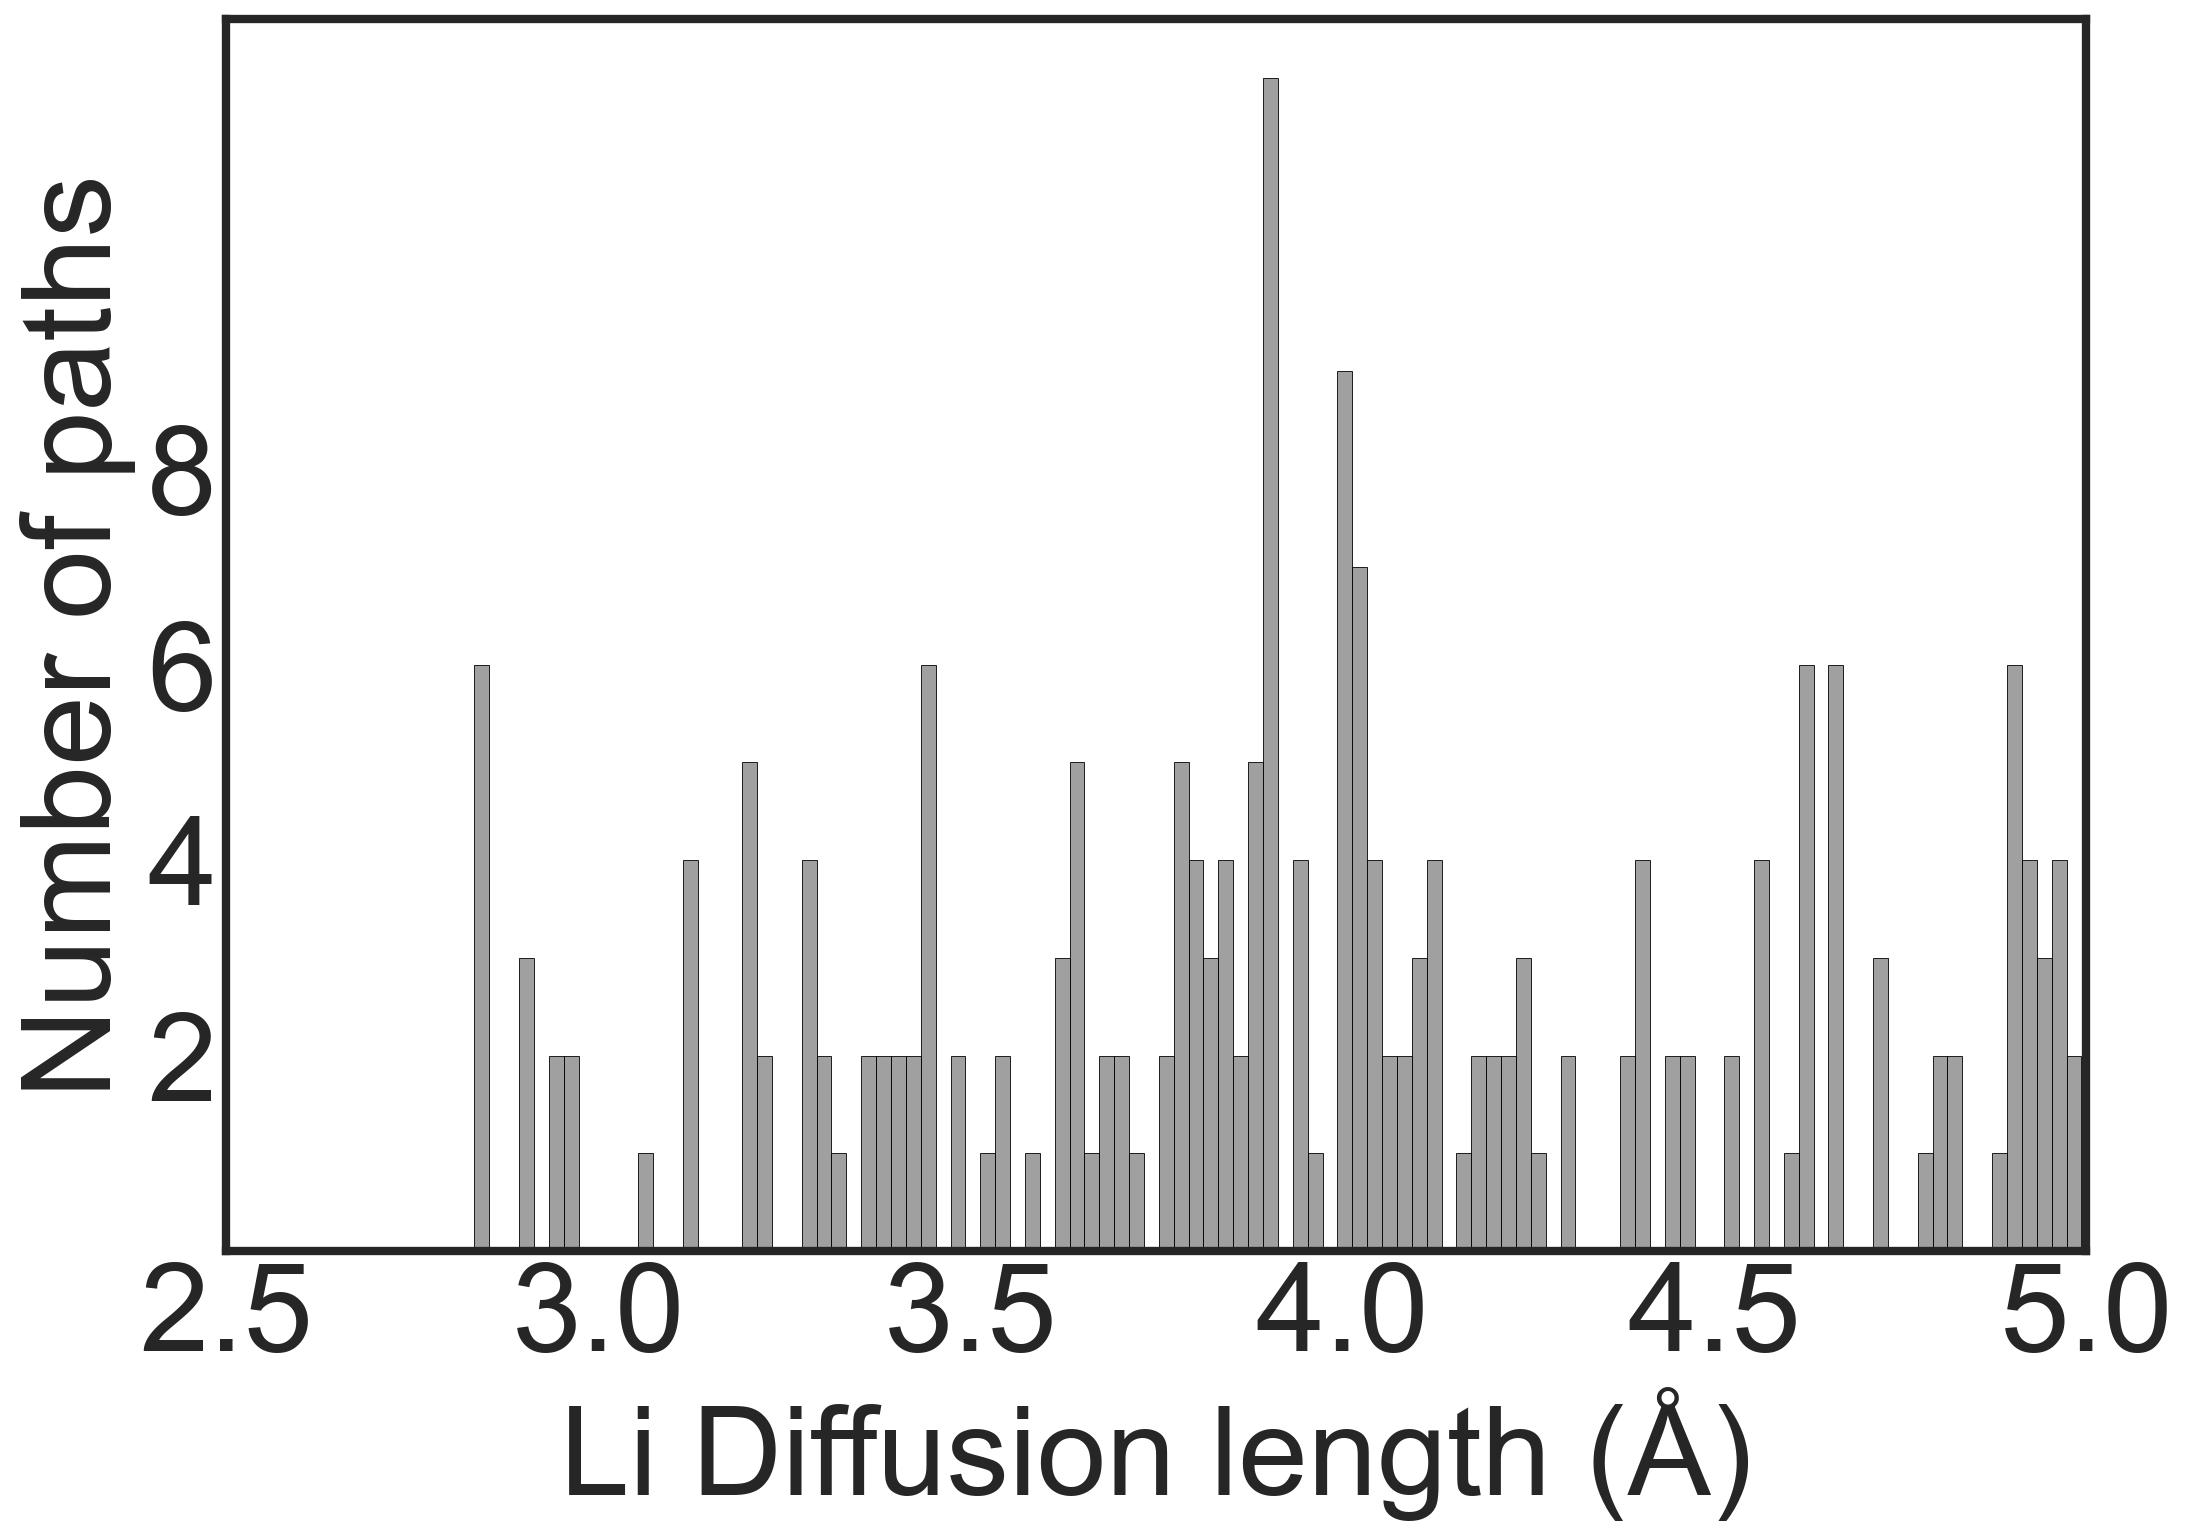

In [9]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02, stat="count",edgecolor = "black",color = 'grey')
#sns.histplot(data=dff, binwidth=0.02)
#sns.distplot(df, bins=0.02)
#common_norm=True
ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)
#plt.ylim(0, 0.1)
plt.xlim(2.5, 5)
plt.yticks([2, 4, 6, 8],fontsize=45)
plt.xticks([2.5, 3.0, 3.5, 4.0, 4.5, 5.0],fontsize=45)
plt.xlabel('Li Diffusion length (Å)', fontsize=45)
plt.ylabel('Number of paths', fontsize=45)
plt.savefig('noc_hse06_mbd_nl_lpsclbr_light_unit.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)

In [49]:
s = Structure.from_file(join(source_dir, "../rdf/pbesol_lpscl_s_cl_exchanged_416_at.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

280

In [51]:
s = Structure.from_file(join(source_dir, "../rdf/pbesol_lpscl_s_cl_exchanged_conventional_mp.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

274

# PBEsol

In [ ]:
/home/users/sbanerjee/argyrodites/lpscl/s_cl_exchanged_conventional_mp/pbesol
FreeEng in eV -2477026.892944199 0.763559E+04 416 ./416_atom_supercell/aims.out
FreeEng in eV -309628.361431947 0.954545E+03 52 ./aims.out

/home/users/sbanerjee/argyrodites/lpscl/conventional_mp/pbesol
FreeEng in eV -309630.956863152 0.995218E+03 52 ./aims.out

In [39]:
#RE in meV/atom
print("RE in meV/atom size cconsistency check:",((-2477026.892944199/8-(-309628.361431947))*1000)/52)
#RE(S-Cl exchange)
print("RE(S-Cl exchange):",((-309628.361431947-(-309630.956863152))*1000)/52)

RE in meV/atom size cconsistency check: -0.003578421176196291
RE(S-Cl exchange): 49.91213855772423


# PBE+TS

In [ ]:
/home/users/sbanerjee/argyrodites/lpscl/s_cl_exchanged_conventional_mp/pbe_ts
FreeEng in eV -310174.307338328 0.950497E+03 52 -24.33593721 ./aims.out

/home/users/sbanerjee/argyrodites/lpscl/conventional_mp/ts
FreeEng in eV -310172.173133760 0.100847E+04 52 -22.33400658 ./aims.out

In [40]:
#RE(S-Cl exchange)
print("RE(S-Cl exchange):",((-310174.307338328-(-310172.173133760))*1000)/52)

RE(S-Cl exchange): -41.04239553831016


In [52]:
s = Structure.from_file(join(source_dir, "../rdf/pbesol_lpscl_conventional_mp.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

61

In [21]:
s = Structure.from_file(join(source_dir, "../rdf/lpscl_conventional_mp_pbesol.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

61

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.


113 2.597845662114188
201 2.6087674993799395
162 2.676875942515284
163 2.676875942515285
85 2.694858353749059
86 2.6948583537490607
245 2.8017798698767664
246 2.801779869876768
261 2.8207378504324576
262 2.8207378504324585
229 2.911813803087114
230 2.9118138030871146
227 2.9369165712261625
228 2.936916571226164
15 2.949485444794051
219 2.9494854447940524
169 2.9620882227808734
258 2.9620882227808742
57 2.9916762492068893
278 2.9916762492068973
96 3.01569735673376
274 3.015697356733767
209 3.0590732493857673
143 3.059073249385774
122 3.079113056680247
222 3.0791131954199957
3 3.092016509608348
4 3.09201650960835
11 3.0999731006370363
118 3.099973100637051
45 3.100273560999159
273 3.100273560999164
190 3.1037652915195277
191 3.103765291519528
242 3.1051381930508937
243 3.1051381930508946
263 3.122044064946518
264 3.12204406494652
254 3.1467089416532215
270 3.1490851829424304
109 3.1490853477968517
89 3.1580608281865863
90 3.158060828186587
181 3.1768596691039592
266 3.176859669103962
67 

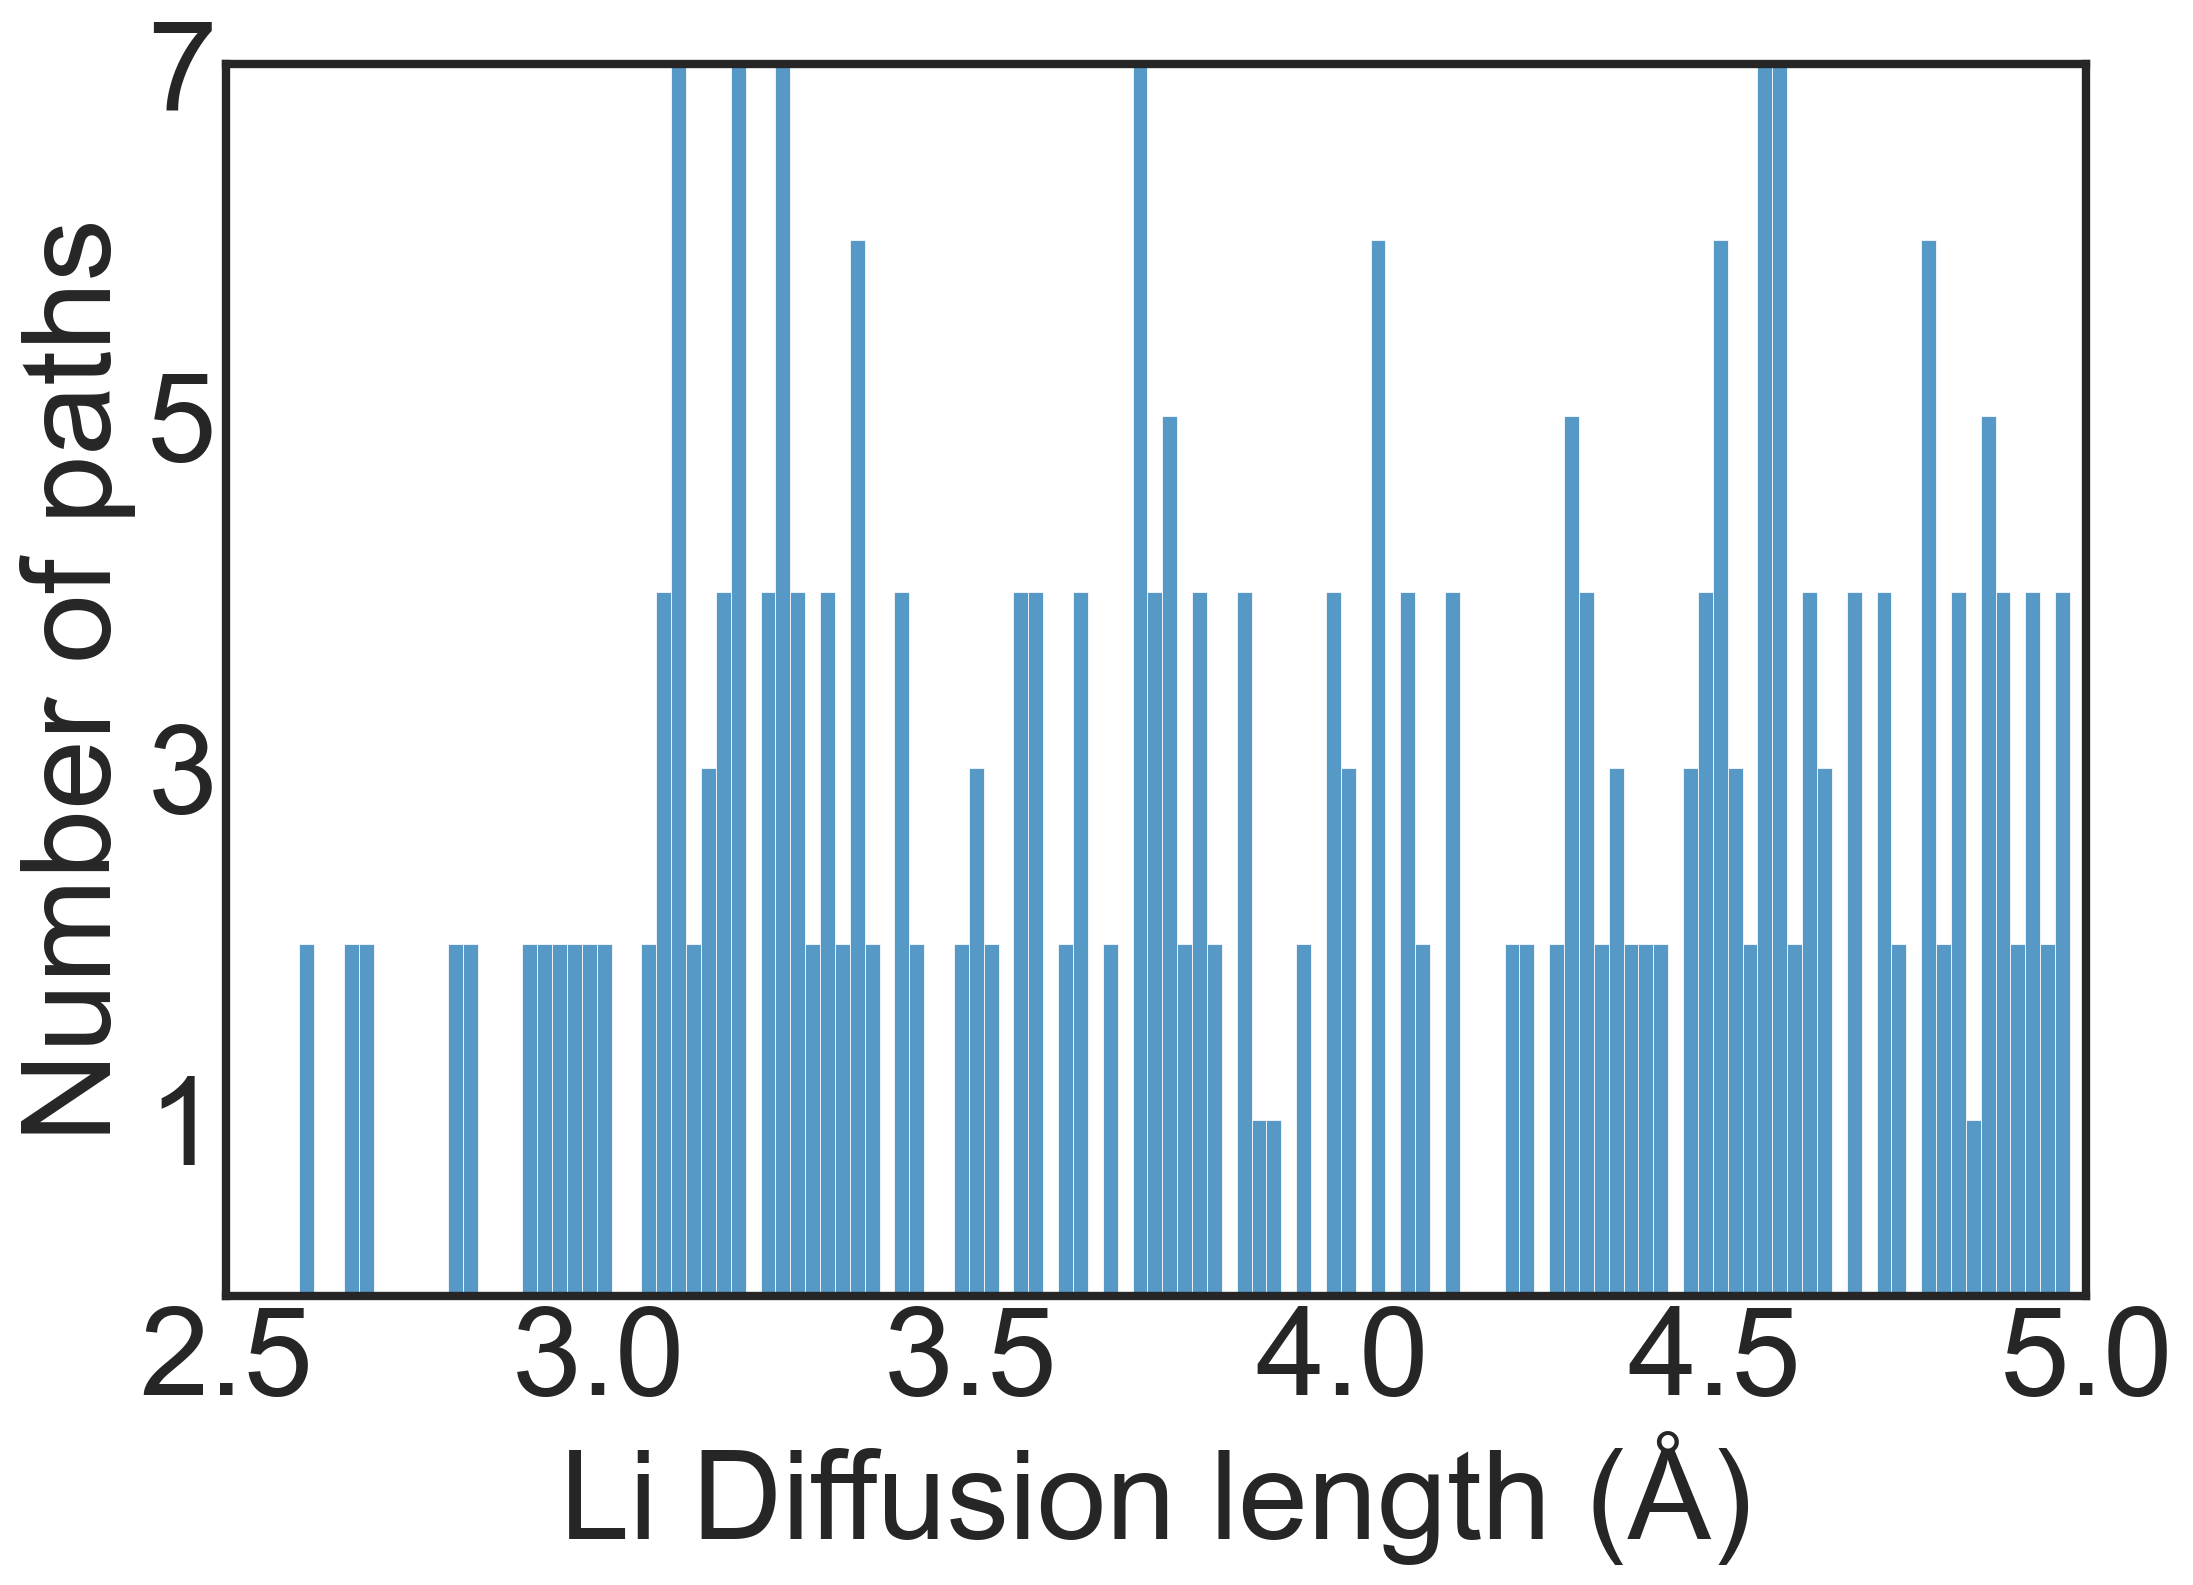

In [48]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02)

ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)
plt.ylim(0, 7)
plt.xlim(2.5, 5)
plt.yticks([1, 3, 5, 7],fontsize=45)
plt.xticks([2.5, 3.0, 3.5, 4.0, 4.5, 5.0],fontsize=45)
plt.xlabel('Li Diffusion length (Å)', fontsize=45)
plt.ylabel('Number of paths', fontsize=45)
plt.savefig('noc_pbesol_lpscl_s_cl_exchanged_416_at.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)

# LPSI

In [66]:
s = Structure.from_file(join(source_dir, "lpsi_hse_06_light.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

61

In [73]:
s = Structure.from_file(join(source_dir, "lpsi_hse_06_ts_geometry.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

79

In [70]:
s = Structure.from_file(join(source_dir, "lpsi_hse_06_mbd_nl_mbdnl.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

68

In [17]:
s = Structure.from_file(join(source_dir, "../rdf/lpsi_hse_06_mbd_nl_408_atom.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

70

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.


5 2.724108715017669
43 2.7493113001359055
4 2.779449270722751
17 3.05869721466356
18 3.058697214663562
6 3.0767708732677095
7 3.076770873267711
13 3.1632331236945257
36 3.163643682803123
46 3.211236421147557
28 3.212794356421031
61 3.215531873743942
24 3.2157650291734536
65 3.252219544230086
50 3.252259522203496
32 3.262527620676099
33 3.2625276206760994
21 3.39149987475137
22 3.391499874751371
15 3.435710621275302
16 3.4357106212753035
34 3.4809654854169922
35 3.4809654854169927
44 3.6992098446623416
66 3.7099885734660933
59 3.710159621112392
2 3.8264432499853647
3 3.826443249985365
19 3.889411336972527
20 3.8894113369725294
26 3.9083663031526186
8 3.9092158622544537
56 3.9589513110950505
38 3.9593443035892175
55 4.052721152071163
25 4.054216506147957
41 4.091005662649849
57 4.091775529655178
64 4.190419440371992
42 4.1905208382973225
60 4.198645427174844
9 4.199765499368552
12 4.253863603998447
45 4.256490567761244
49 4.316348347870615
58 4.316403699209242
54 4.388690646270427
10 4.3

No handles with labels found to put in legend.


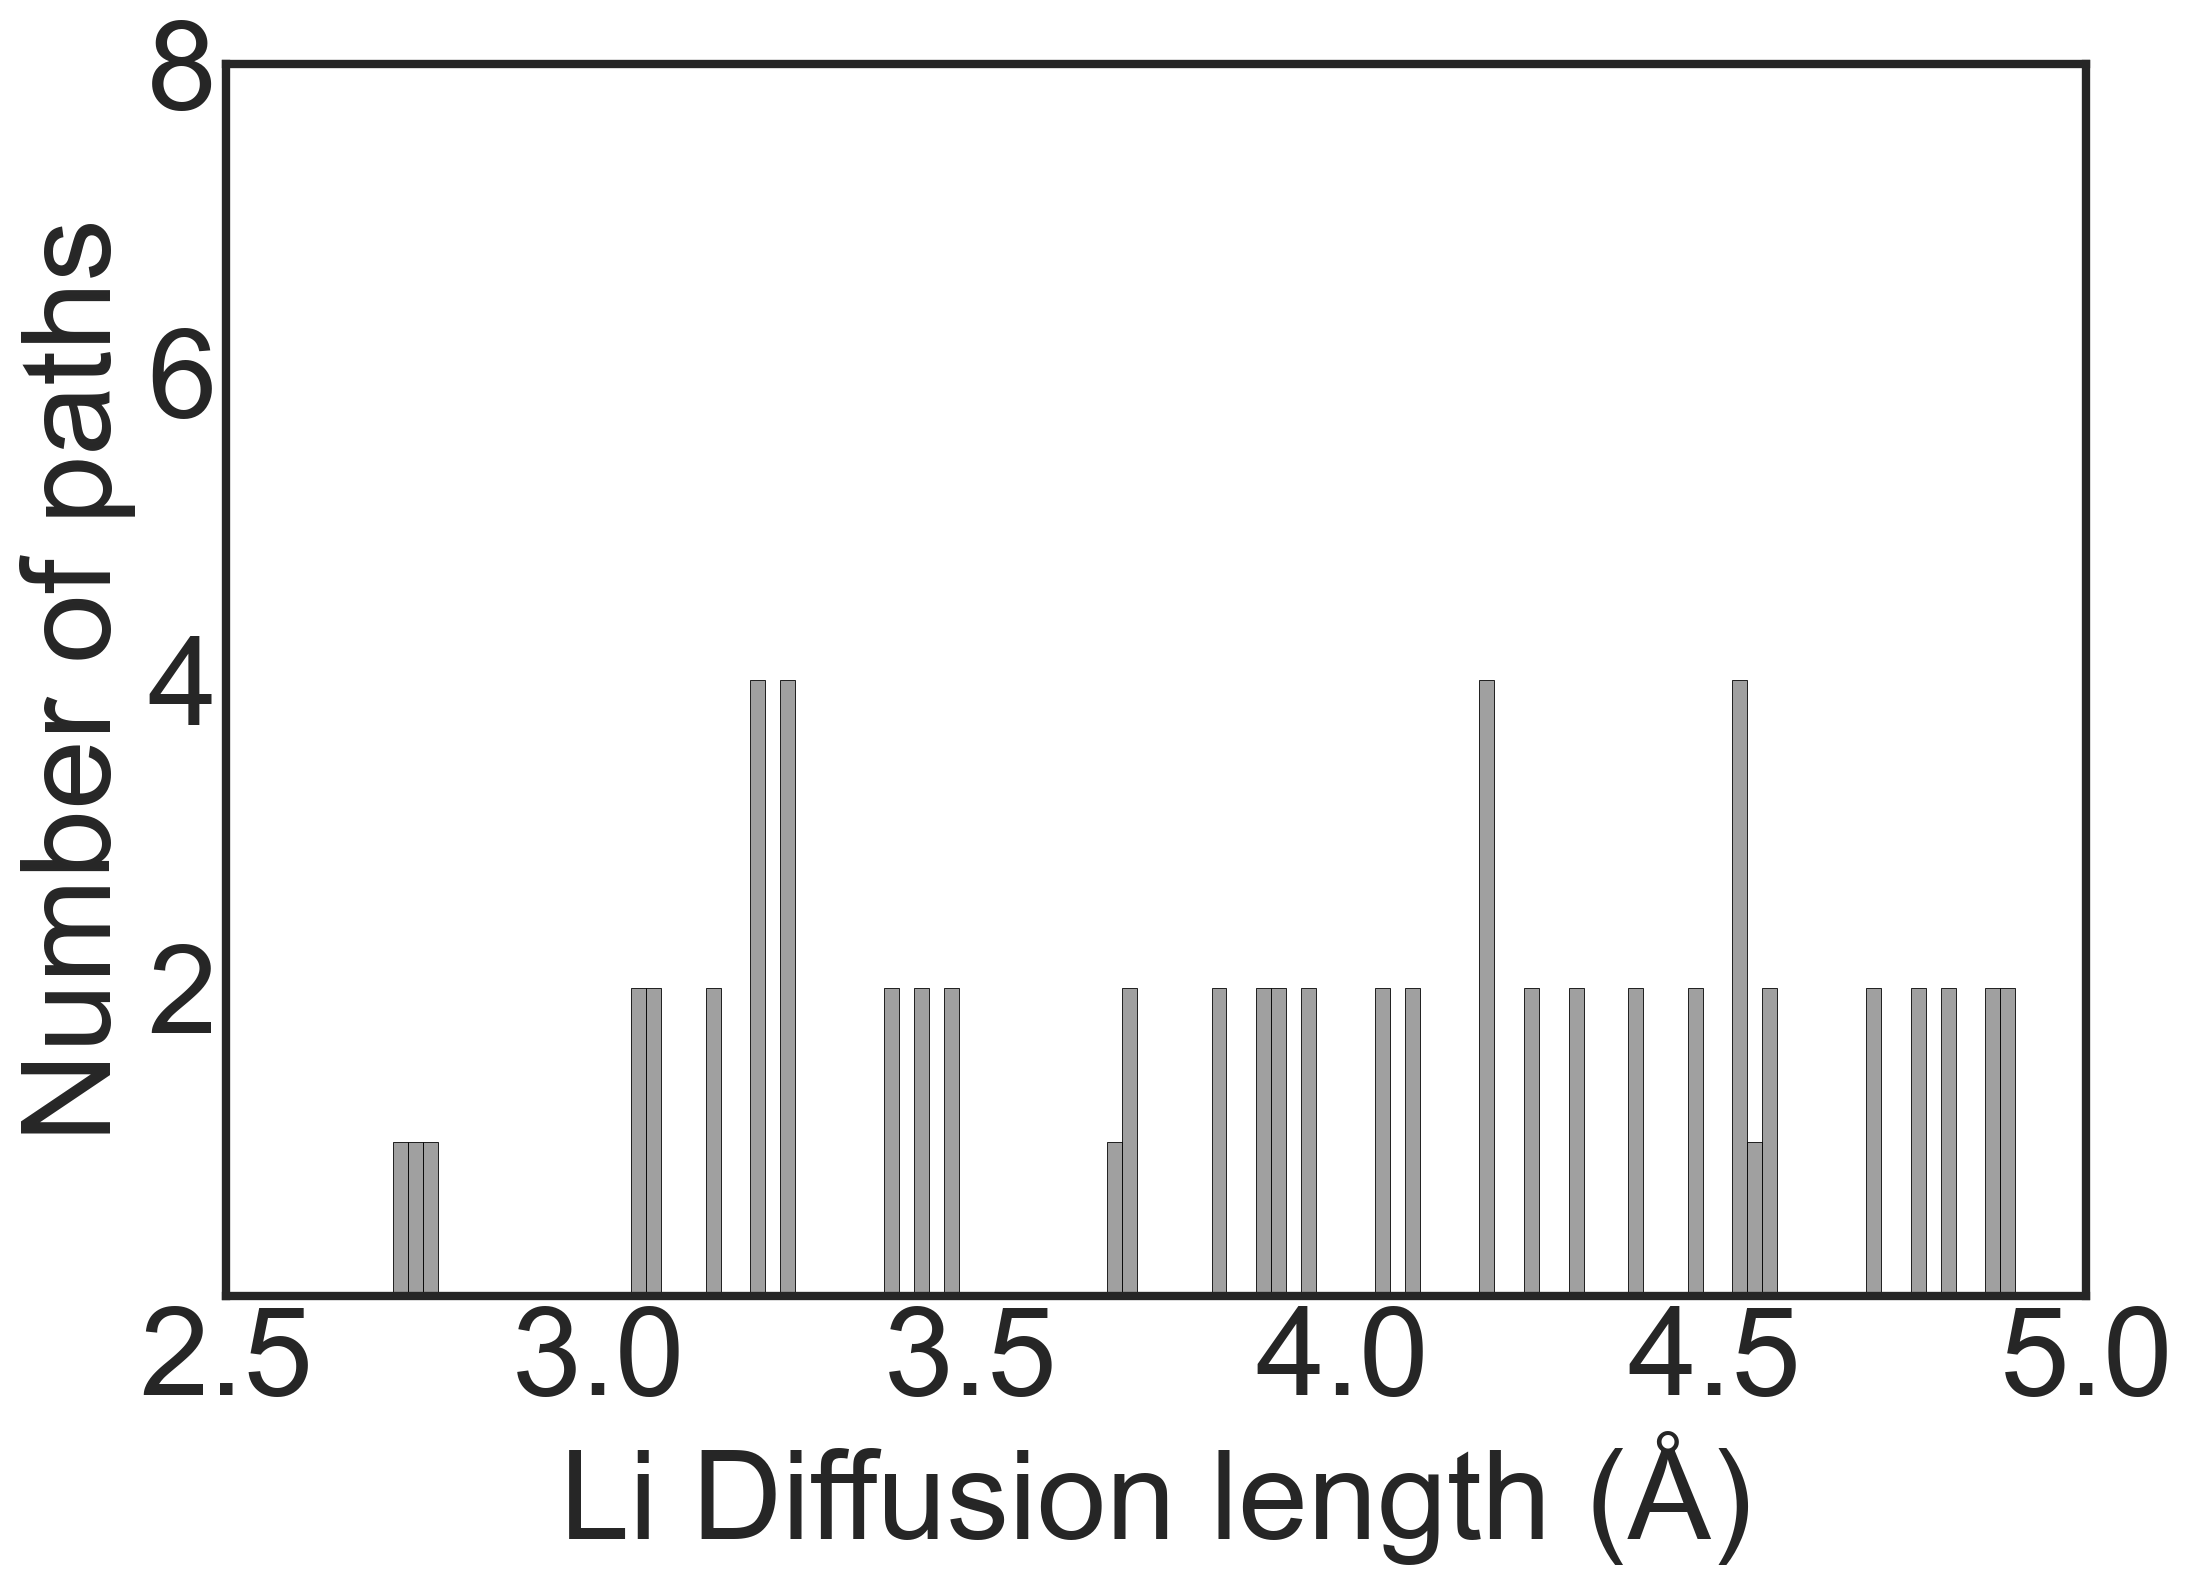

280

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


2 2.4944439154347977
224 2.54118731404561
225 2.5411873140456125
235 2.6870089684595344
236 2.687008968459535
244 2.766447514747417
245 2.766447514747419
108 2.783471263384941
109 2.783471263384944
19 2.8033744283207134
20 2.8033744283207143
117 2.8486960584344354
264 2.848697158877784
112 2.858642764133463
15 2.85864452244631
49 2.8808141303022965
50 2.880814130302298
251 2.942389151013629
252 2.9423891510136313
11 2.9979532311442894
12 2.9979532311442902
154 3.0051481031303133
43 3.0051531311965736
74 3.1248626344781925
75 3.124862634478195
275 3.1300335559532044
46 3.130037164964785
279 3.207065029713126
169 3.2070702441322942
180 3.212283779234445
142 3.212283997718879
165 3.2126035448382546
59 3.2126060380409327
97 3.2188207654068934
204 3.2188220779874324
128 3.223634590042487
129 3.22363459004249
53 3.227911619565142
54 3.227911619565145
26 3.2313347247158957
67 3.231338055630826
9 3.2325572941864005
10 3.2325572941864027
13 3.2566698668001117
83 3.2566715962605652
246 3.2741873

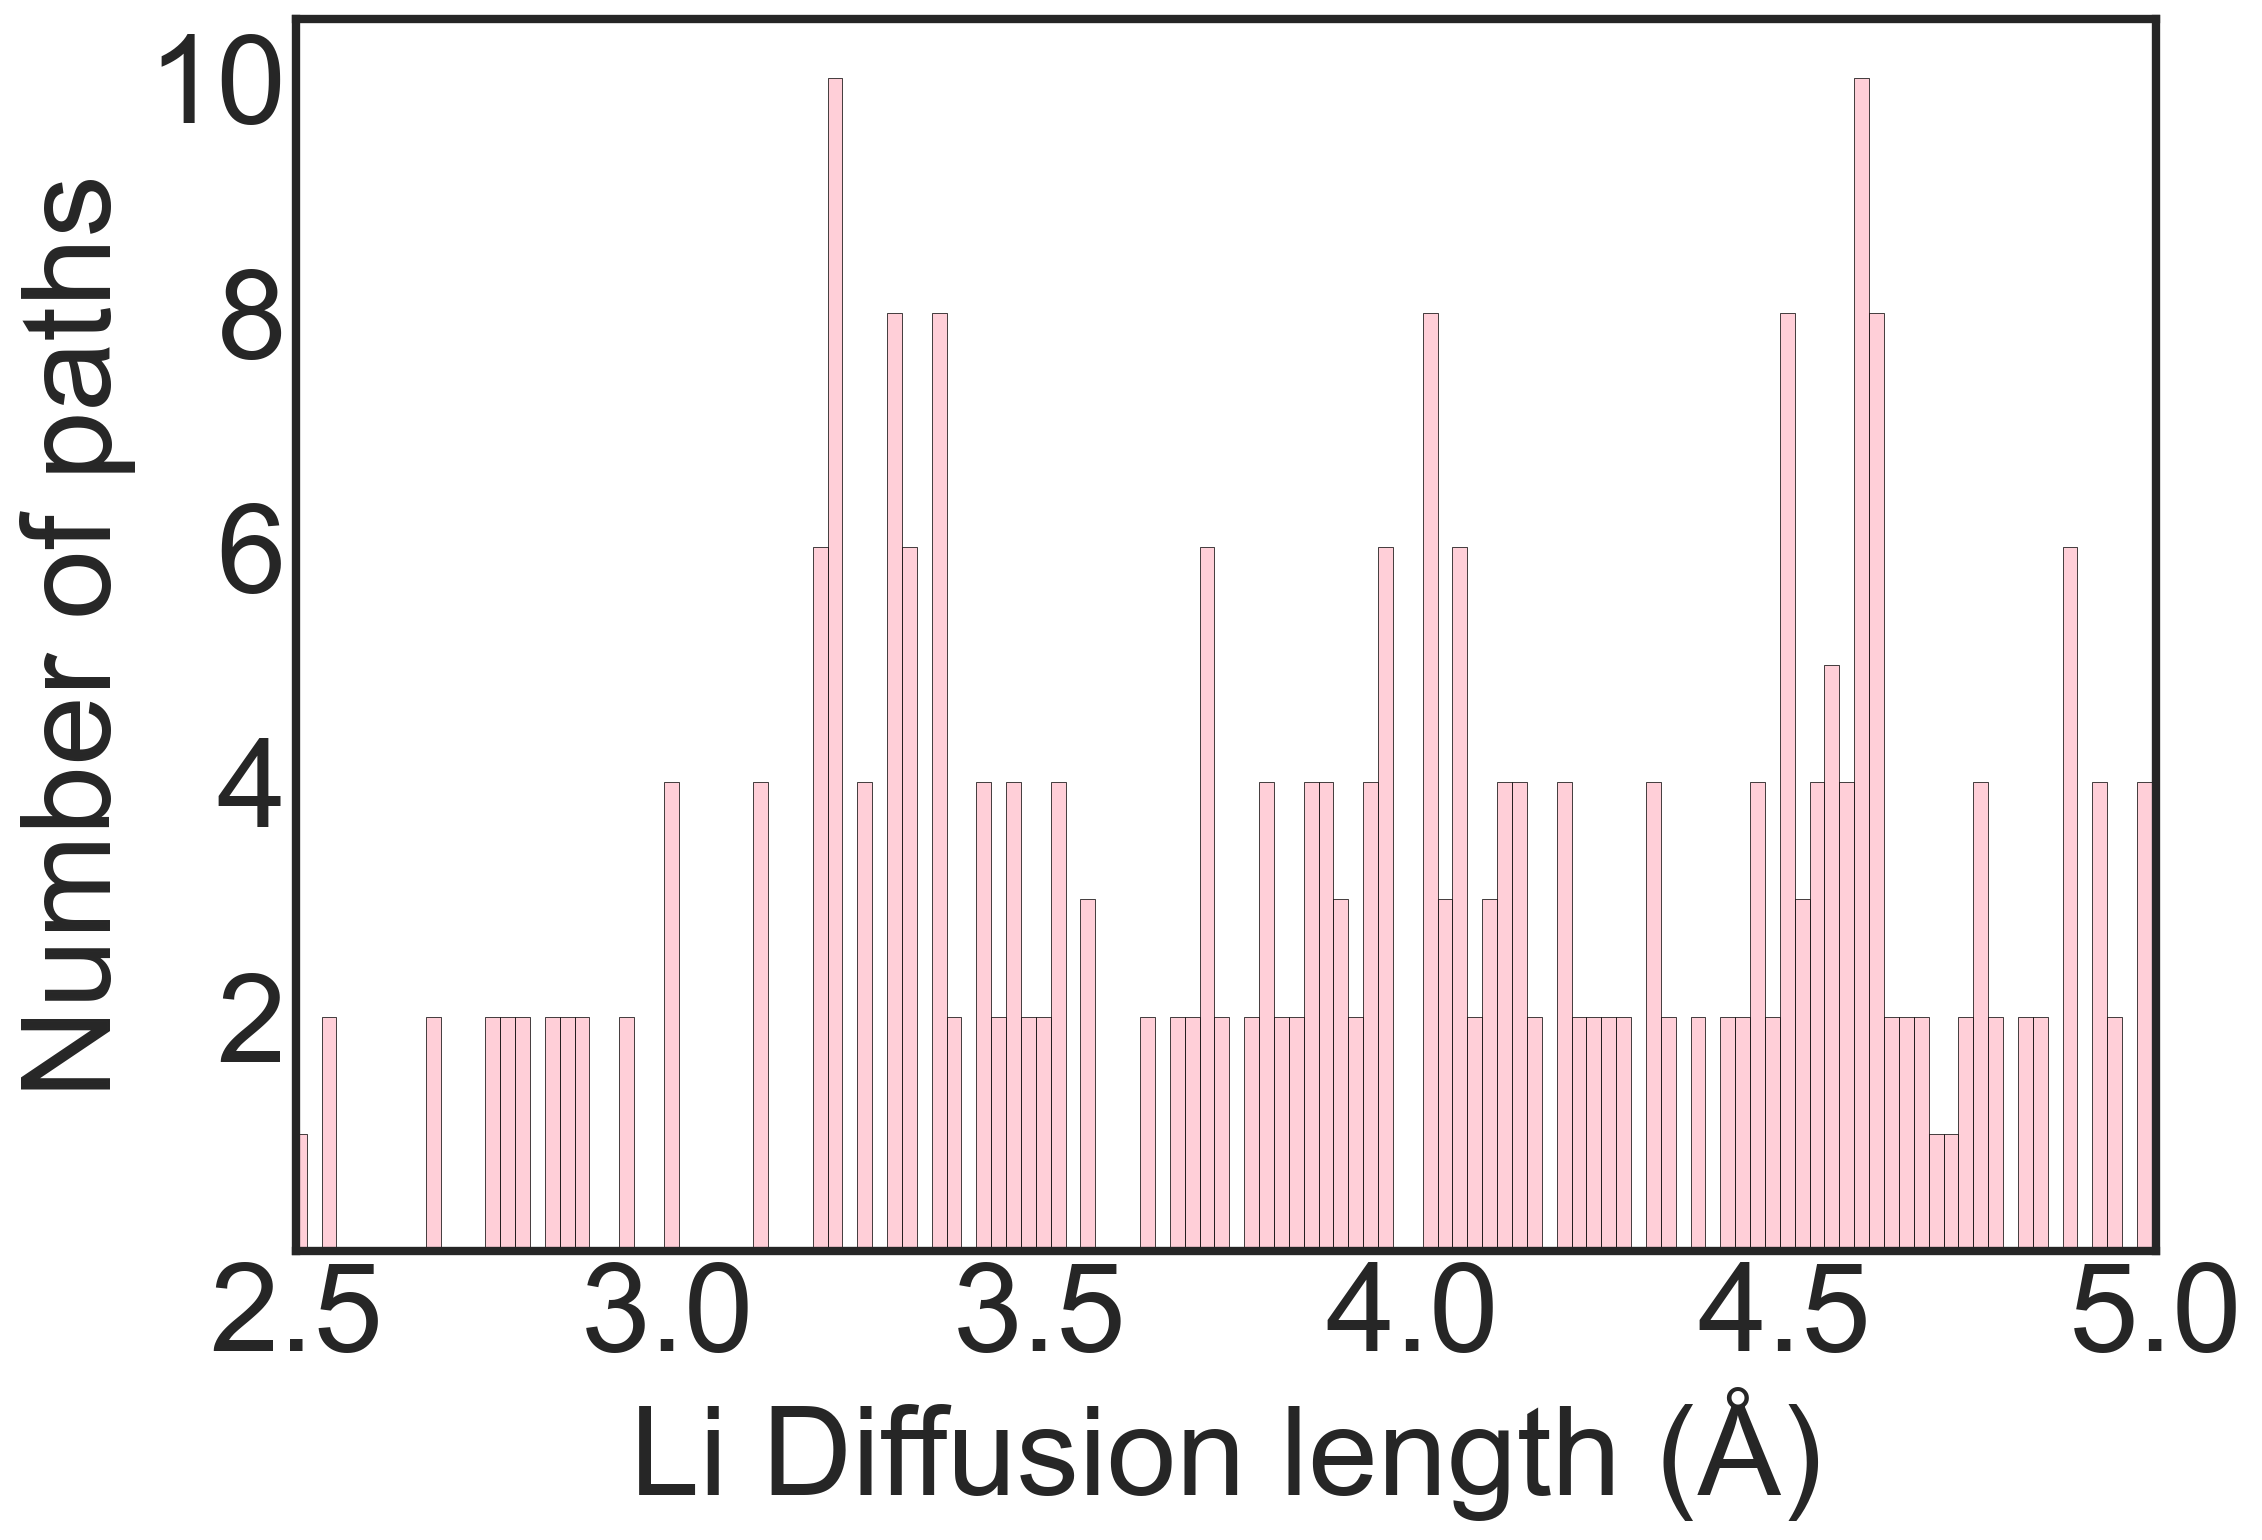

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.


77 2.610443429758054
75 2.610478891560555
3 2.6858449253977477
37 2.9759238360877798
25 2.9759784925228008
47 3.0776276505779316
57 3.0776391928526166
31 3.133759646961816
32 3.133759646961817
20 3.142019025239984
15 3.142020937399955
54 3.1579681157989805
55 3.1579681157989814
16 3.247791692914564
0 3.247854879498567
13 3.3361069541109774
14 3.336106954110978
27 3.3716351434510194
28 3.371635143451021
70 3.5012093858698385
67 3.501209687596176
63 3.5425264651939914
64 3.542526465193993
12 3.728799160199639
19 3.728827651335787
8 3.8510984010924543
9 3.8510984010924547
65 3.9779869441370517
71 3.9779887169897905
26 3.990752203090924
38 3.99080742208874
69 4.030353107415358
74 4.0303724917797235
33 4.037781503709841
40 4.037800556163759
61 4.03917450487503
53 4.039175034039642
6 4.117851261869439
23 4.117922443839495
36 4.136520825957755
44 4.136521218792874
45 4.1814094651136635
46 4.181409465113665
2 4.189035871348715
22 4.189094820286468
60 4.2319756241455435
56 4.231998530987021
39 

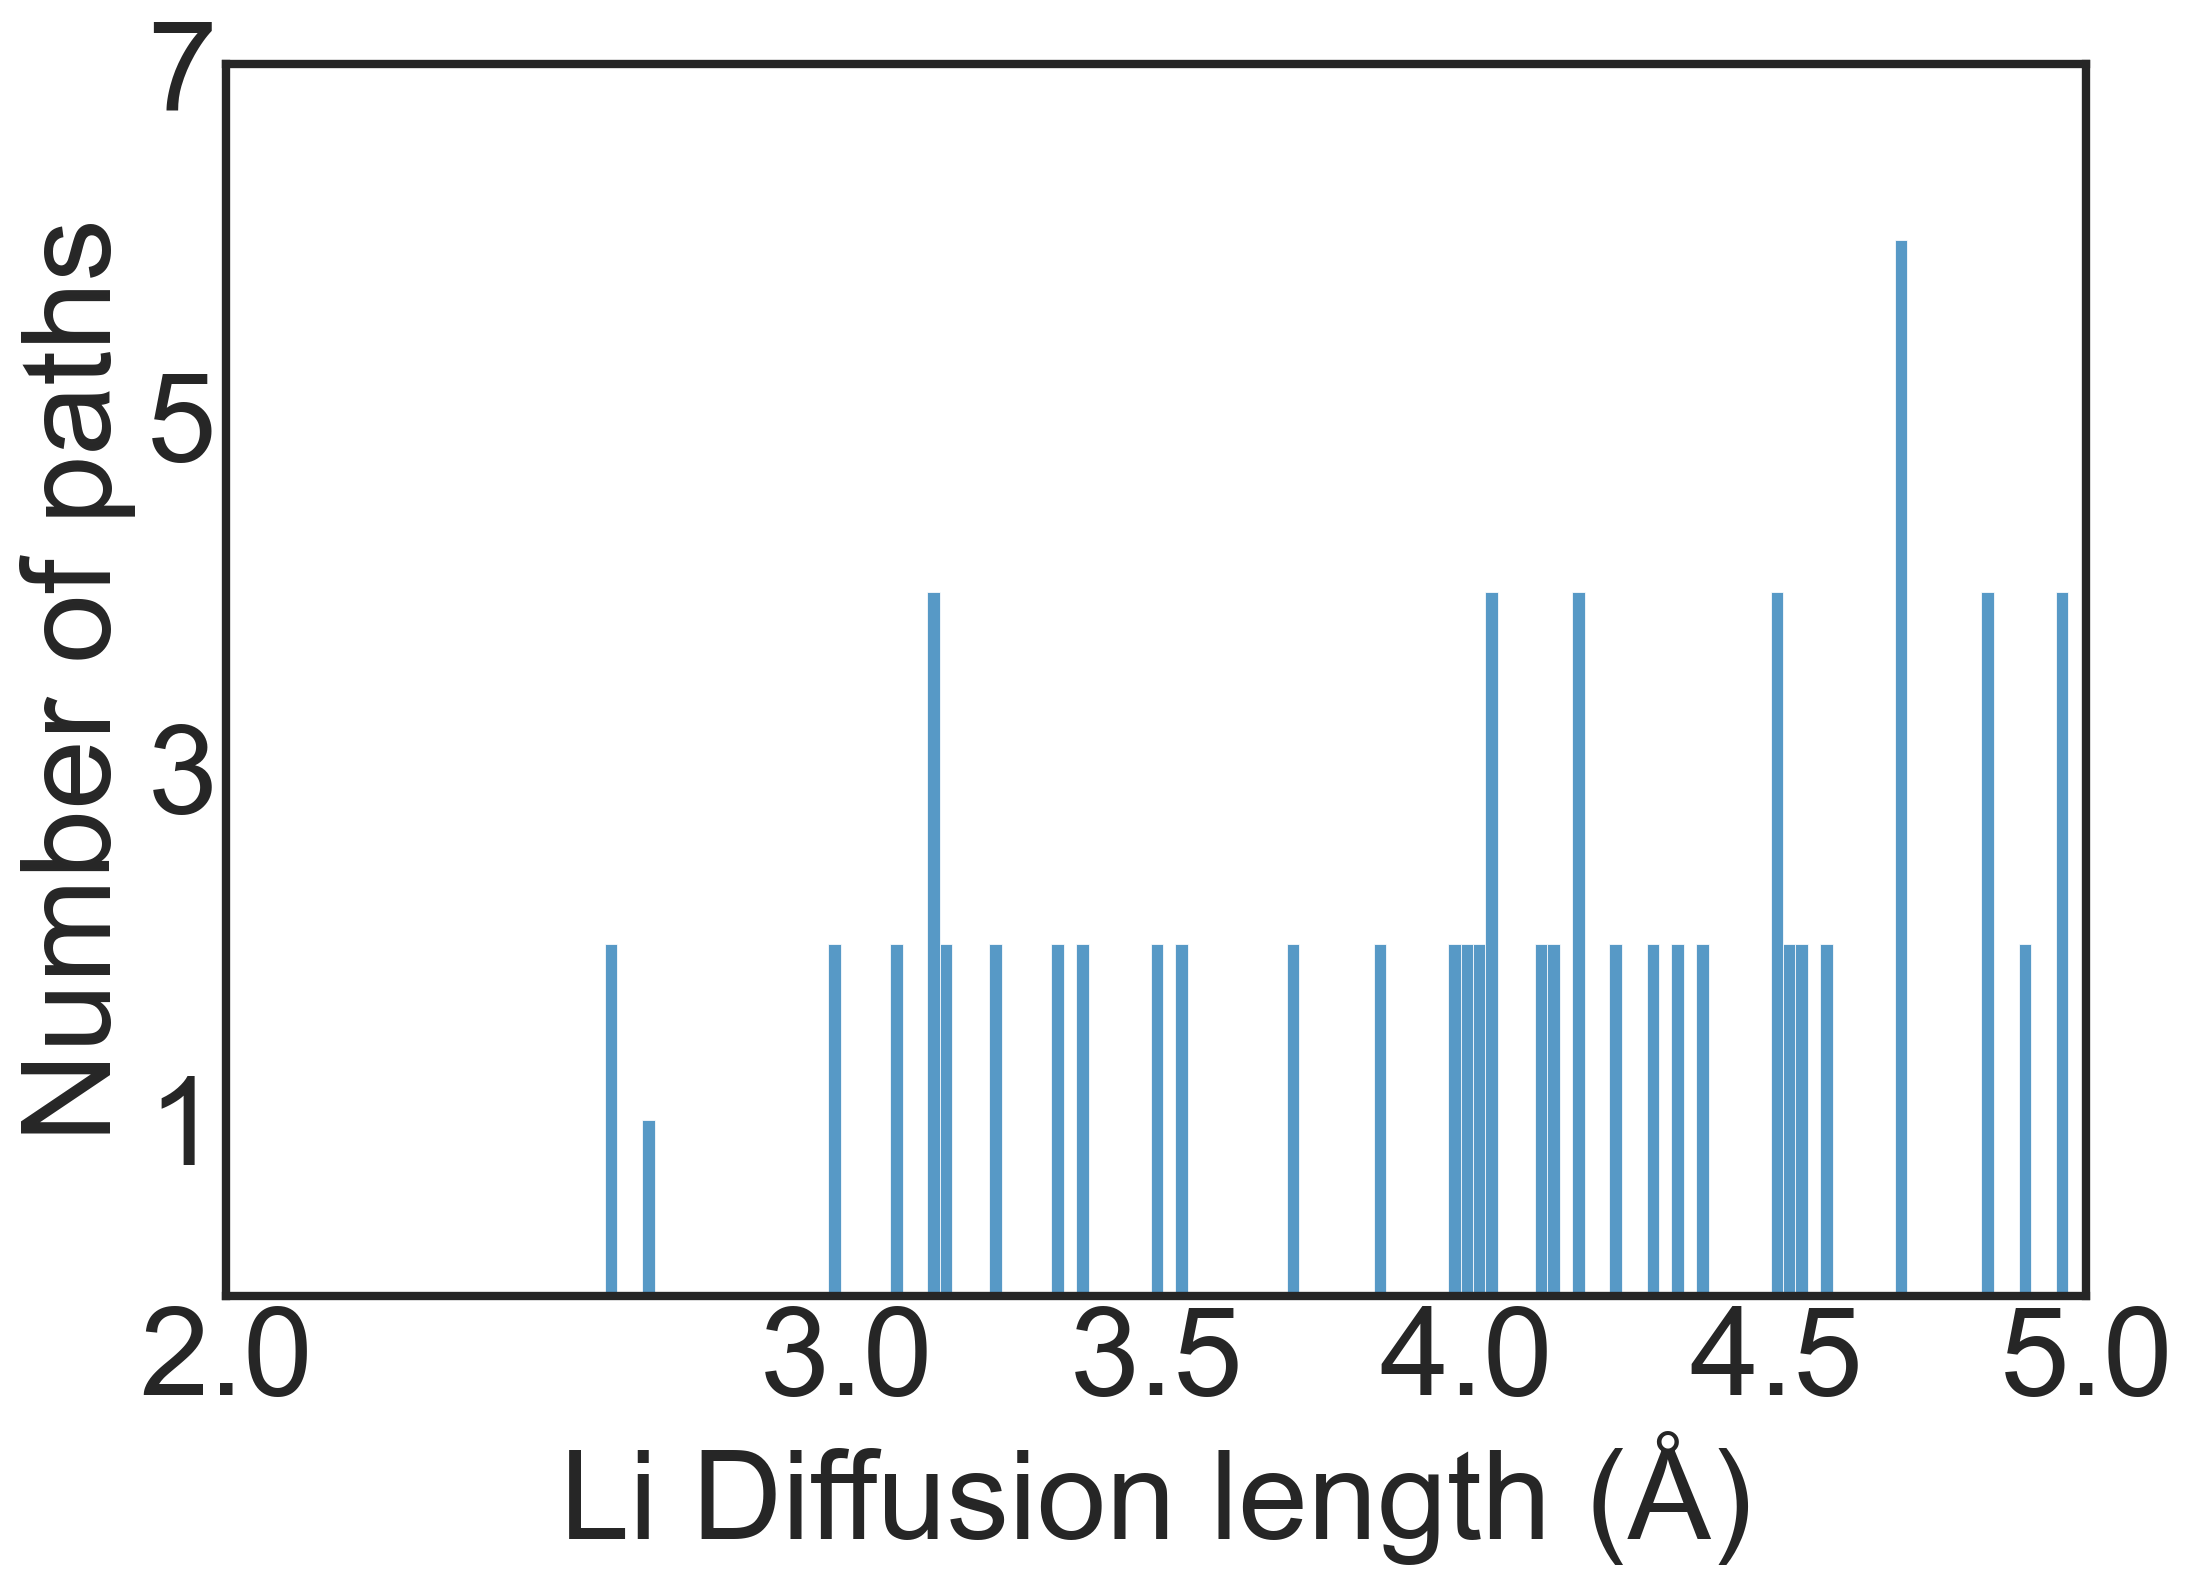

In [74]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02)

ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)
plt.ylim(0, 7)
plt.xlim(2.0, 5)
plt.yticks([1, 3, 5, 7],fontsize=45)
plt.xticks([2.0, 3.0, 3.5, 4.0, 4.5, 5.0],fontsize=45)
plt.xlabel('Li Diffusion length (Å)', fontsize=45)
plt.ylabel('Number of paths', fontsize=45)
plt.savefig('test_noc_lpsi_hse_06_ts_geometry.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
No handles with labels found to put in legend.


57 2.825185023626036
59 2.8251852403334645
2 2.8824343881910317
3 2.8824343881910326
45 3.232629681266019
39 3.2326306065395176
13 3.252947135589752
0 3.2529488107985194
26 3.307576186570825
27 3.307576186570828
10 3.3237063525699977
11 3.323706352569998
42 3.3666857691534737
43 3.366685769153474
23 3.38887031595164
12 3.4218806966729076
16 3.421881626892158
31 3.4915191416013727
21 3.491521672540071
49 3.515735303292995
50 3.5157353032929968
54 3.546181642820758
52 3.5461822626292814
9 3.6901836699631105
15 3.6901871151644032
22 3.770563990672771
32 3.770566209287382
48 3.976911926920248
41 3.976911971952427
56 4.014241087061905
53 4.014242562699397
8 4.034959972721219
55 4.086368630640545
51 4.086369144267264
34 4.1169712515630845
28 4.1169720863572
6 4.155117138307787
19 4.155117452236935
24 4.197115828321528
33 4.197116651704918
38 4.2119798120816725
1 4.218789474327115
18 4.2187900537512375
30 4.226730576000479
37 4.226732035302567
44 4.337553193171861
47 4.337554911201888
17 4.34

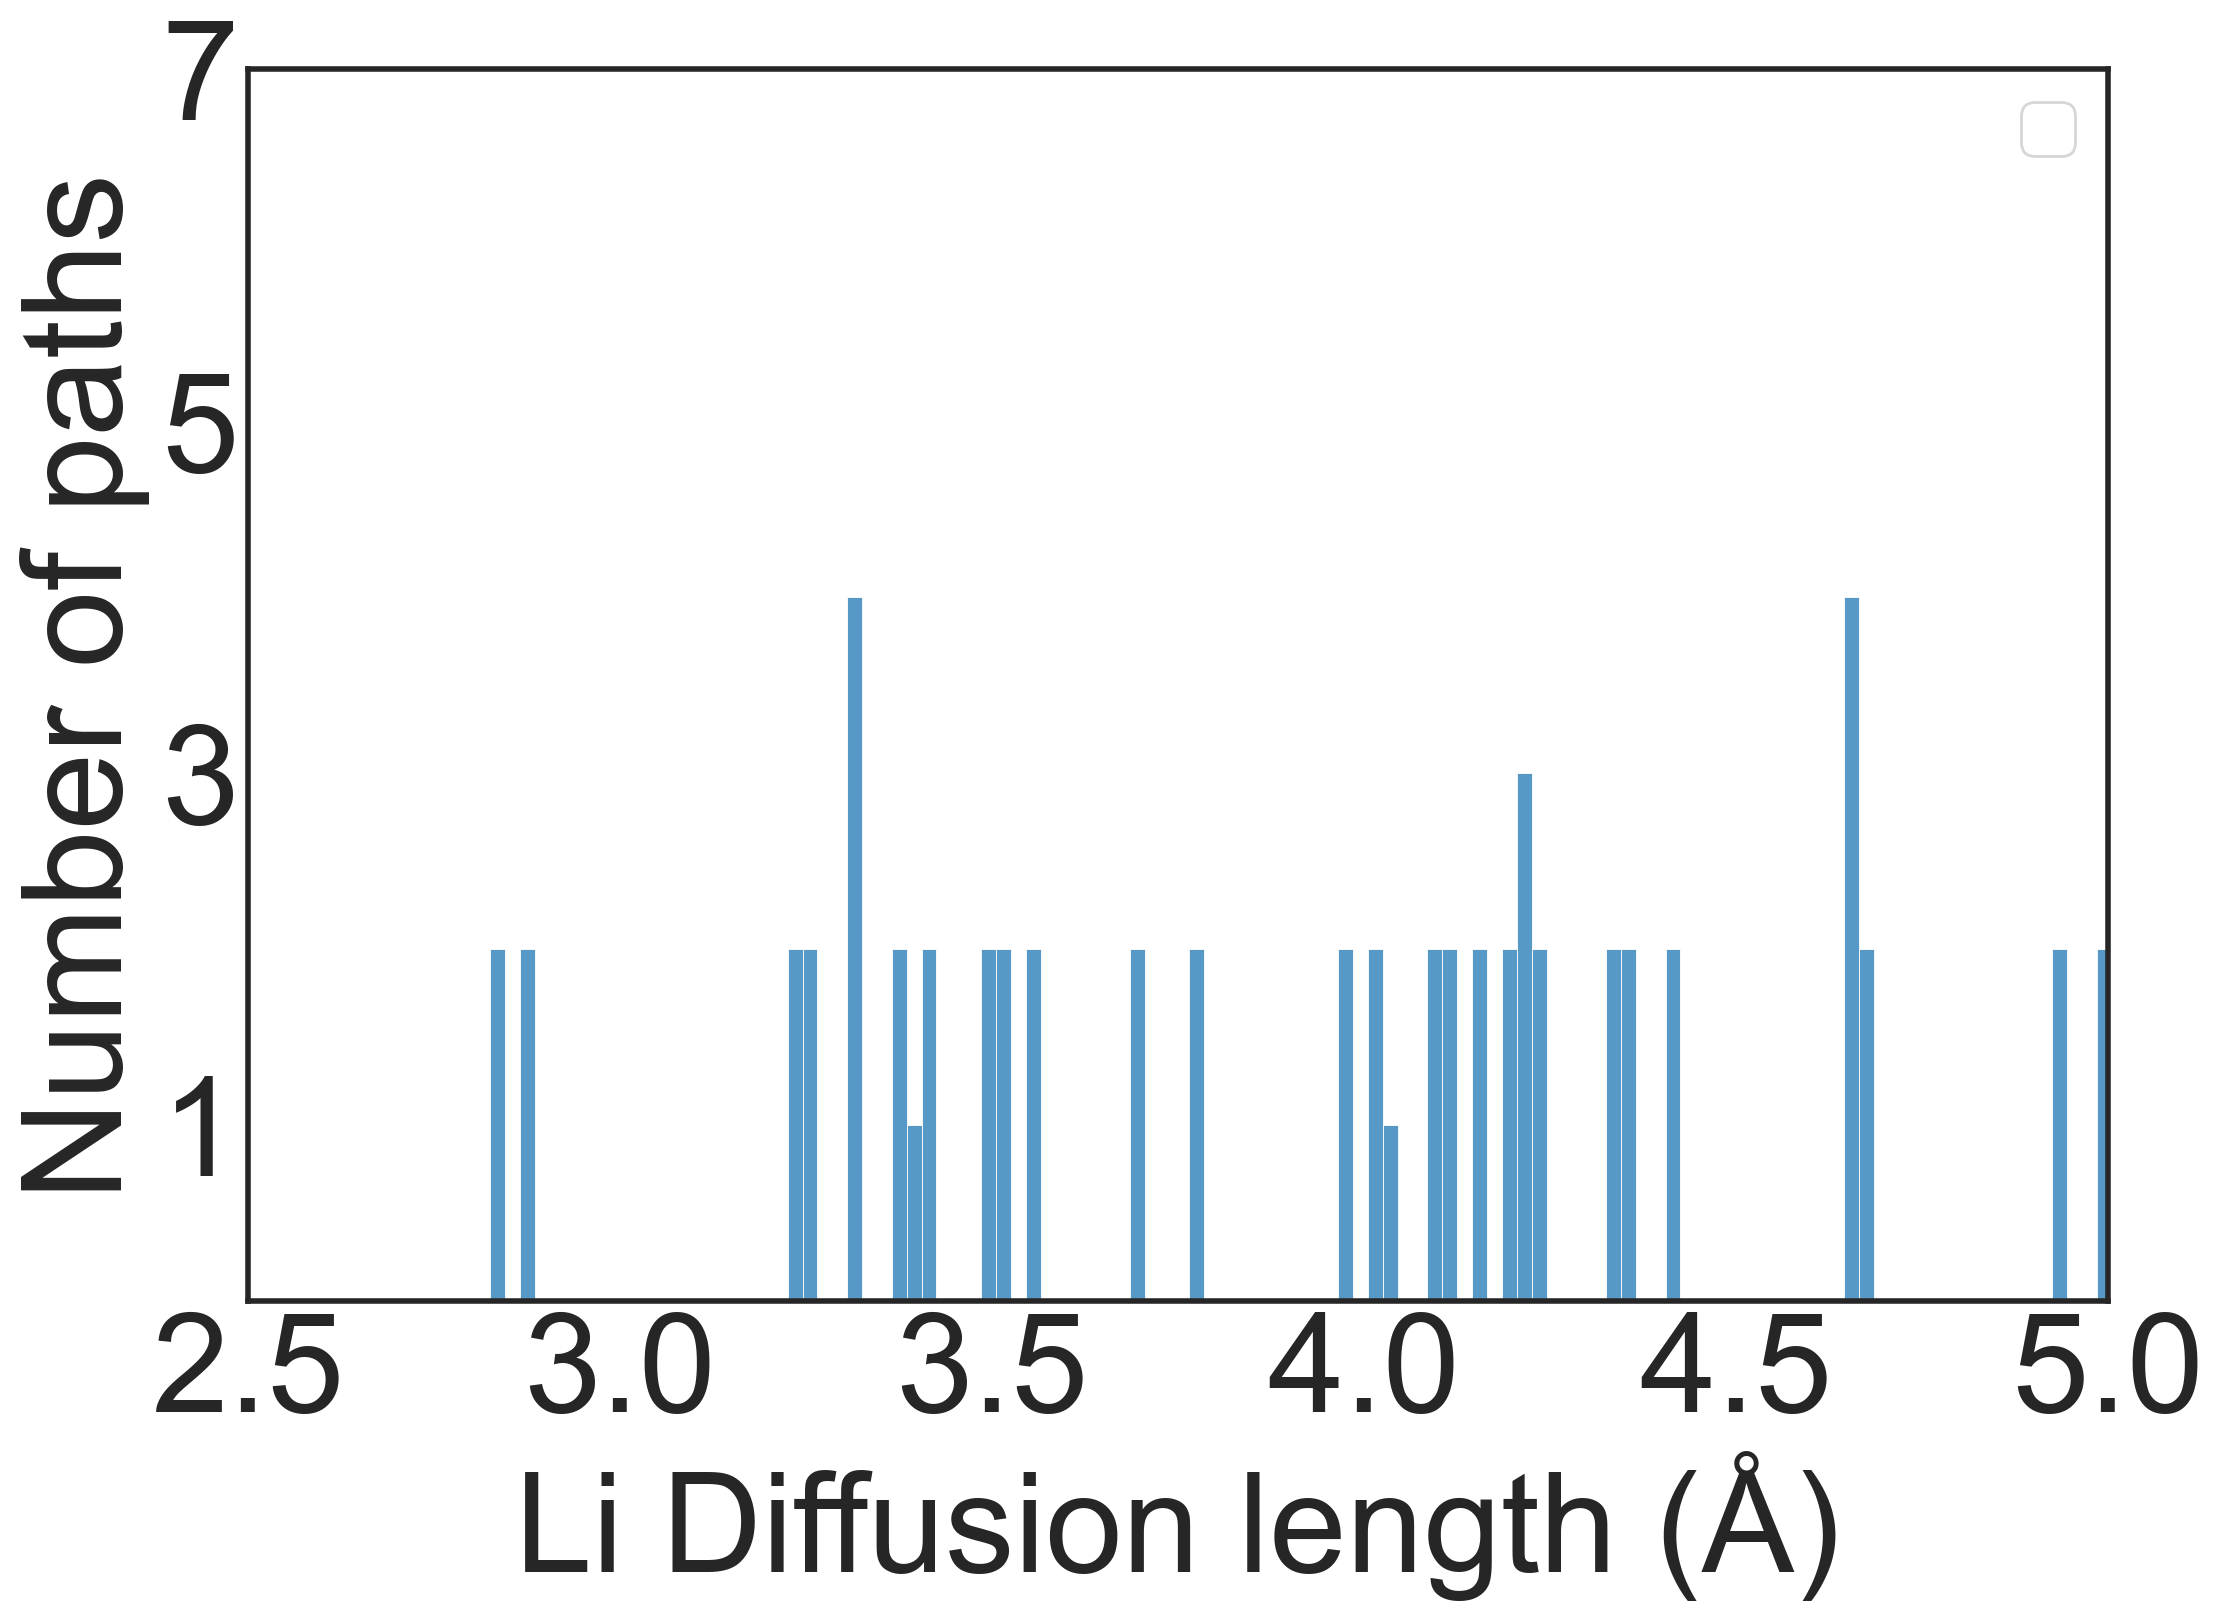

In [43]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02)

ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
#plt.ylabel("Number of Li-diffusion paths",size=28)
#plt.xlabel("Li Diffusion length (Å)",size=28)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
plt.tick_params(direction="in",length=5, width=2)
#lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)

#plt.title(label = 'LPSCL', loc=1)
#Li$_6$PS$_5$C
plt.ylim(0, 7)
plt.xlim(2.5, 5)
#plt.legend(loc = 1, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
#plt.legend()
plt.yticks([1, 3, 5, 7],fontsize=50)
plt.xticks([2.5, 3.0, 3.5, 4.0, 4.5, 5.0],fontsize=50)
plt.xlabel('Li Diffusion length (Å)', fontsize=50)
plt.ylabel('Number of paths', fontsize=50)
plt.tick_params(axis='both', labelsize=50, direction='in')#labelsize controls the ticklabel spacing/size 
plt.tight_layout
plt.savefig(fname="./noc_lpscl_conventional_mp_hse06_mbd_nl.png",dpi=300)

#plt.savefig('noc_lpscl_conventional_mp_hse06_mbd_nl.png', dpi=300, format="png",bbox_inches='tight')

In [ ]:
    plt1.ylim(0, 8)
    plt1.xlim(2, 8)
    plt1.legend(loc = 1, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 2.0, 4.0, 6.0, 8.0],fontsize=50)
    plt1.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],fontsize=50)
    plt1.xlabel('r($\AA$)', fontsize=50)
    plt1.ylabel('g(r)', fontsize=50)
    plt1.tick_params(axis='both', labelsize=50, direction='in')#labelsize controls the ticklabel spacing/size 
    plt1.tight_layout()
    plt1.savefig(fname="./600_S_LI_composition.png",dpi=300)

# LPSI

In [41]:
s = Structure.from_file(join(source_dir, "lpsi_hse_06_light.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

61

57 2.825185023626036
59 2.8251852403334645
2 2.8824343881910317
3 2.8824343881910326
45 3.232629681266019
39 3.2326306065395176
13 3.252947135589752
0 3.2529488107985194
26 3.307576186570825
27 3.307576186570828
10 3.3237063525699977
11 3.323706352569998
42 3.3666857691534737
43 3.366685769153474
23 3.38887031595164
12 3.4218806966729076
16 3.421881626892158
31 3.4915191416013727
21 3.491521672540071
49 3.515735303292995
50 3.5157353032929968
54 3.546181642820758
52 3.5461822626292814
9 3.6901836699631105
15 3.6901871151644032
22 3.770563990672771
32 3.770566209287382
48 3.976911926920248
41 3.976911971952427
56 4.014241087061905
53 4.014242562699397
8 4.034959972721219
55 4.086368630640545
51 4.086369144267264
34 4.1169712515630845
28 4.1169720863572
6 4.155117138307787
19 4.155117452236935
24 4.197115828321528
33 4.197116651704918
38 4.2119798120816725
1 4.218789474327115
18 4.2187900537512375
30 4.226730576000479
37 4.226732035302567
44 4.337553193171861
47 4.337554911201888
17 4.34

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.


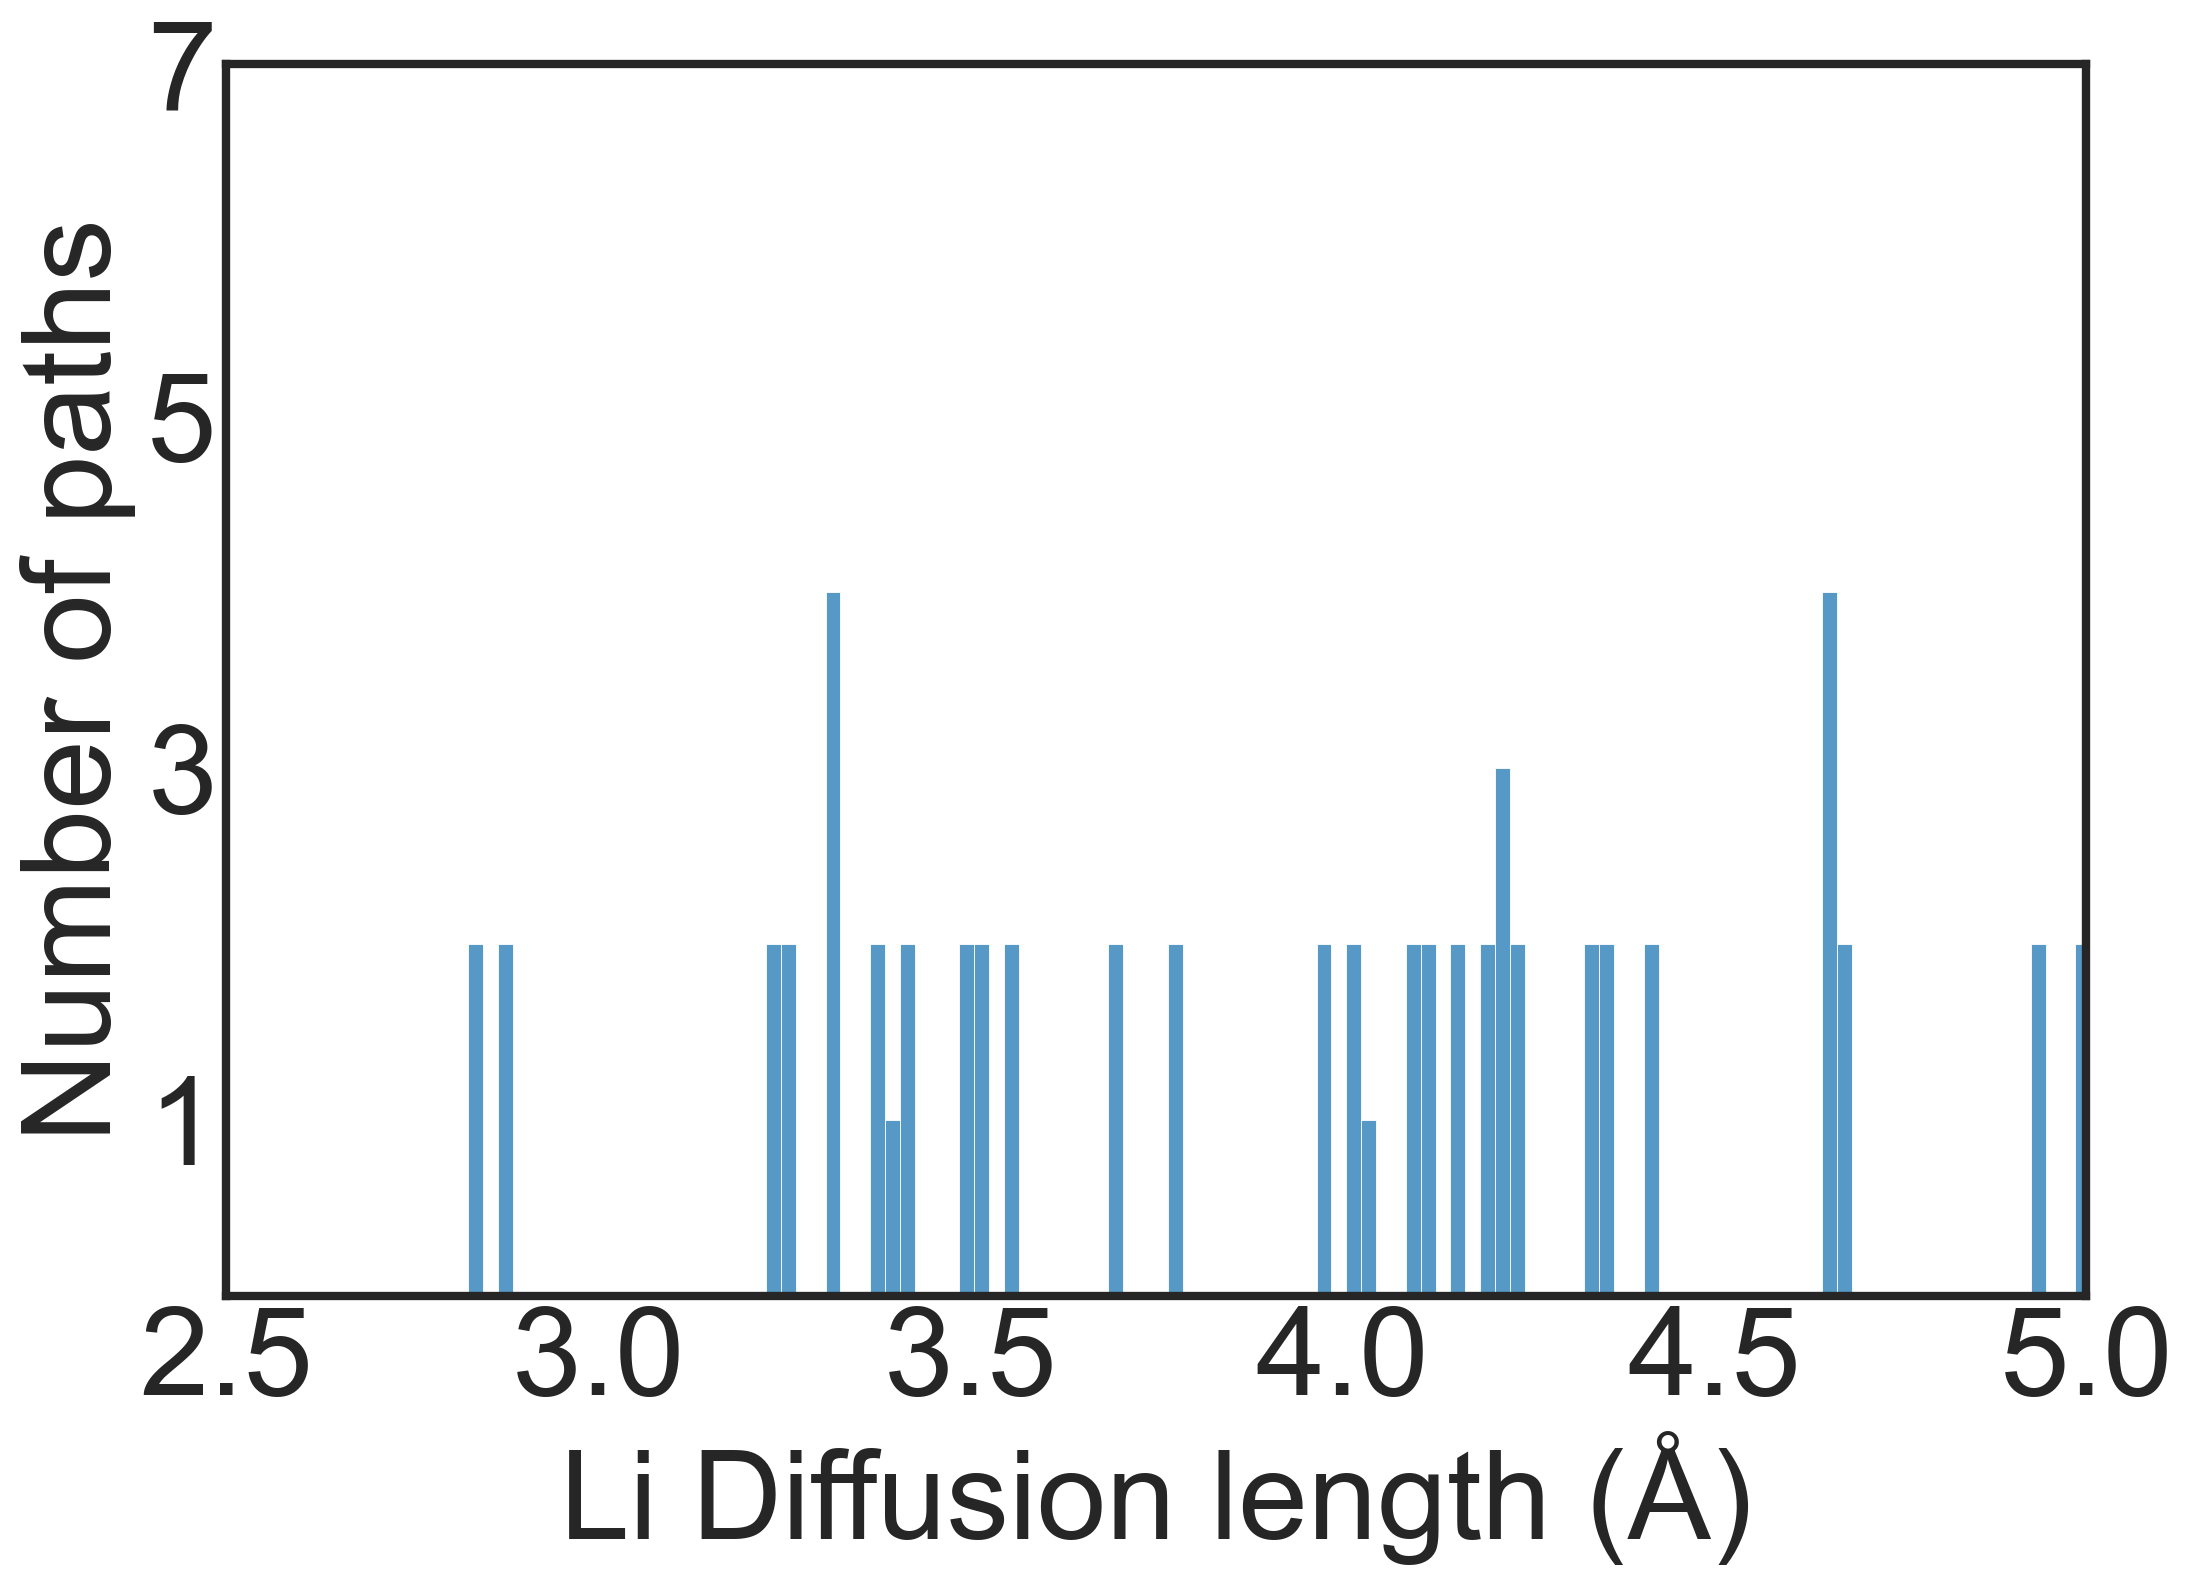

In [47]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02)

ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)
plt.ylim(0, 7)
plt.xlim(2.5, 5)
plt.yticks([1, 3, 5, 7],fontsize=45)
plt.xticks([2.5, 3.0, 3.5, 4.0, 4.5, 5.0],fontsize=45)
plt.xlabel('Li Diffusion length (Å)', fontsize=45)
plt.ylabel('Number of paths', fontsize=45)
plt.savefig('no_of_channel_lpsi_hse_06_light.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)

In [31]:
s = Structure.from_file(join(source_dir, "lpsi_hse_06_ts_geometry.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

79

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.


77 2.610443429758054
75 2.610478891560555
3 2.6858449253977477
37 2.9759238360877798
25 2.9759784925228008
47 3.0776276505779316
57 3.0776391928526166
31 3.133759646961816
32 3.133759646961817
20 3.142019025239984
15 3.142020937399955
54 3.1579681157989805
55 3.1579681157989814
16 3.247791692914564
0 3.247854879498567
13 3.3361069541109774
14 3.336106954110978
27 3.3716351434510194
28 3.371635143451021
70 3.5012093858698385
67 3.501209687596176
63 3.5425264651939914
64 3.542526465193993
12 3.728799160199639
19 3.728827651335787
8 3.8510984010924543
9 3.8510984010924547
65 3.9779869441370517
71 3.9779887169897905
26 3.990752203090924
38 3.99080742208874
69 4.030353107415358
74 4.0303724917797235
33 4.037781503709841
40 4.037800556163759
61 4.03917450487503
53 4.039175034039642
6 4.117851261869439
23 4.117922443839495
36 4.136520825957755
44 4.136521218792874
45 4.1814094651136635
46 4.181409465113665
2 4.189035871348715
22 4.189094820286468
60 4.2319756241455435
56 4.231998530987021
39 

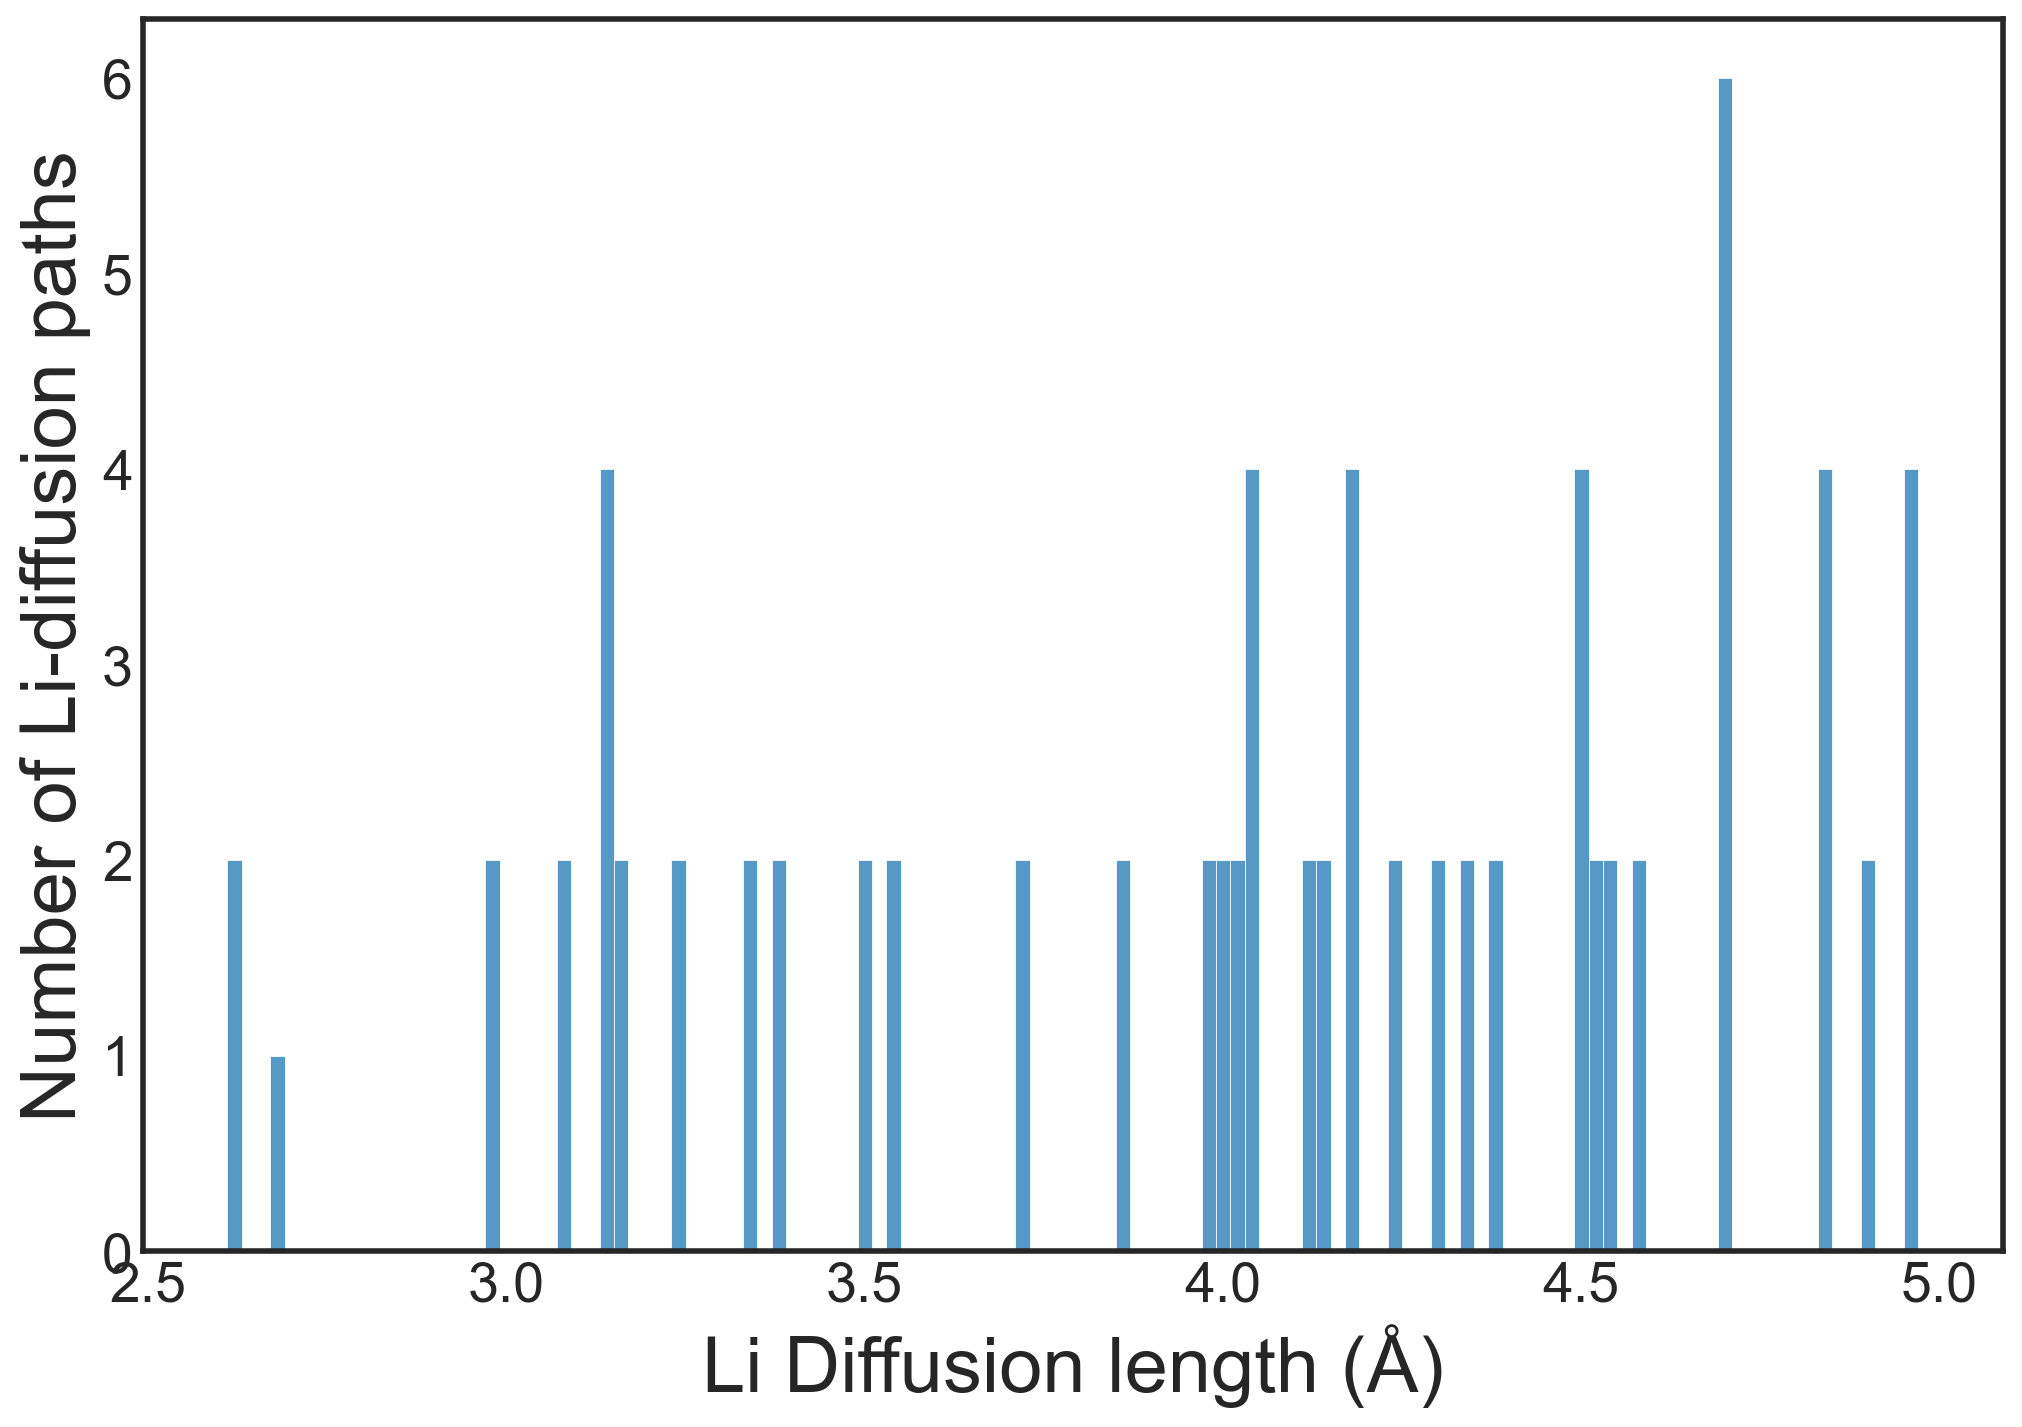

In [32]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02)

ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.ylabel("Number of Li-diffusion paths",size=28)
plt.xlabel("Li Diffusion length (Å)",size=28)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)

plt.savefig('no_of_channel_lpsi_hse_06_ts_light.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)

In [27]:
s = Structure.from_file(join(source_dir, "lpsi_hse_06_mbd_nl_mbdnl.vasp"))
pf = PathFinder(s, "Li")
paths = pf.enumerate_paths(max_distance=5)
len(paths)

68

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.


66 2.7516531962337654
64 2.751655776539312
2 2.803003527089099
3 2.8030035270891
42 3.2074700329021275
48 3.2074713711664344
12 3.2225883480624504
0 3.2225928157895494
10 3.2803106075289983
26 3.2817457470749334
27 3.2817457470749343
45 3.3197354362627727
46 3.3197354362627736
15 3.334956787012647
11 3.334956804948356
22 3.3592802442154333
23 3.3592802442154346
32 3.4040052654668203
20 3.404010208361911
52 3.487978635814748
53 3.4879786358147493
59 3.5103594195461865
56 3.510362000736309
9 3.663667365327196
14 3.663668549959654
21 3.7506597581470356
33 3.7506646311151868
51 3.945792648689454
44 3.945795624502175
58 3.9758945316792498
63 3.975896087687265
8 3.997628753780481
28 4.016967683500424
35 4.016969887983042
60 4.0469915442966675
54 4.046993481557478
6 4.058171421281643
18 4.058184839910461
34 4.147982540834496
24 4.147983173085499
40 4.157180393386563
41 4.157180393386564
1 4.183561485981781
17 4.183567386006229
31 4.193125589962001
39 4.19313109043103
50 4.228410074464789
47 4

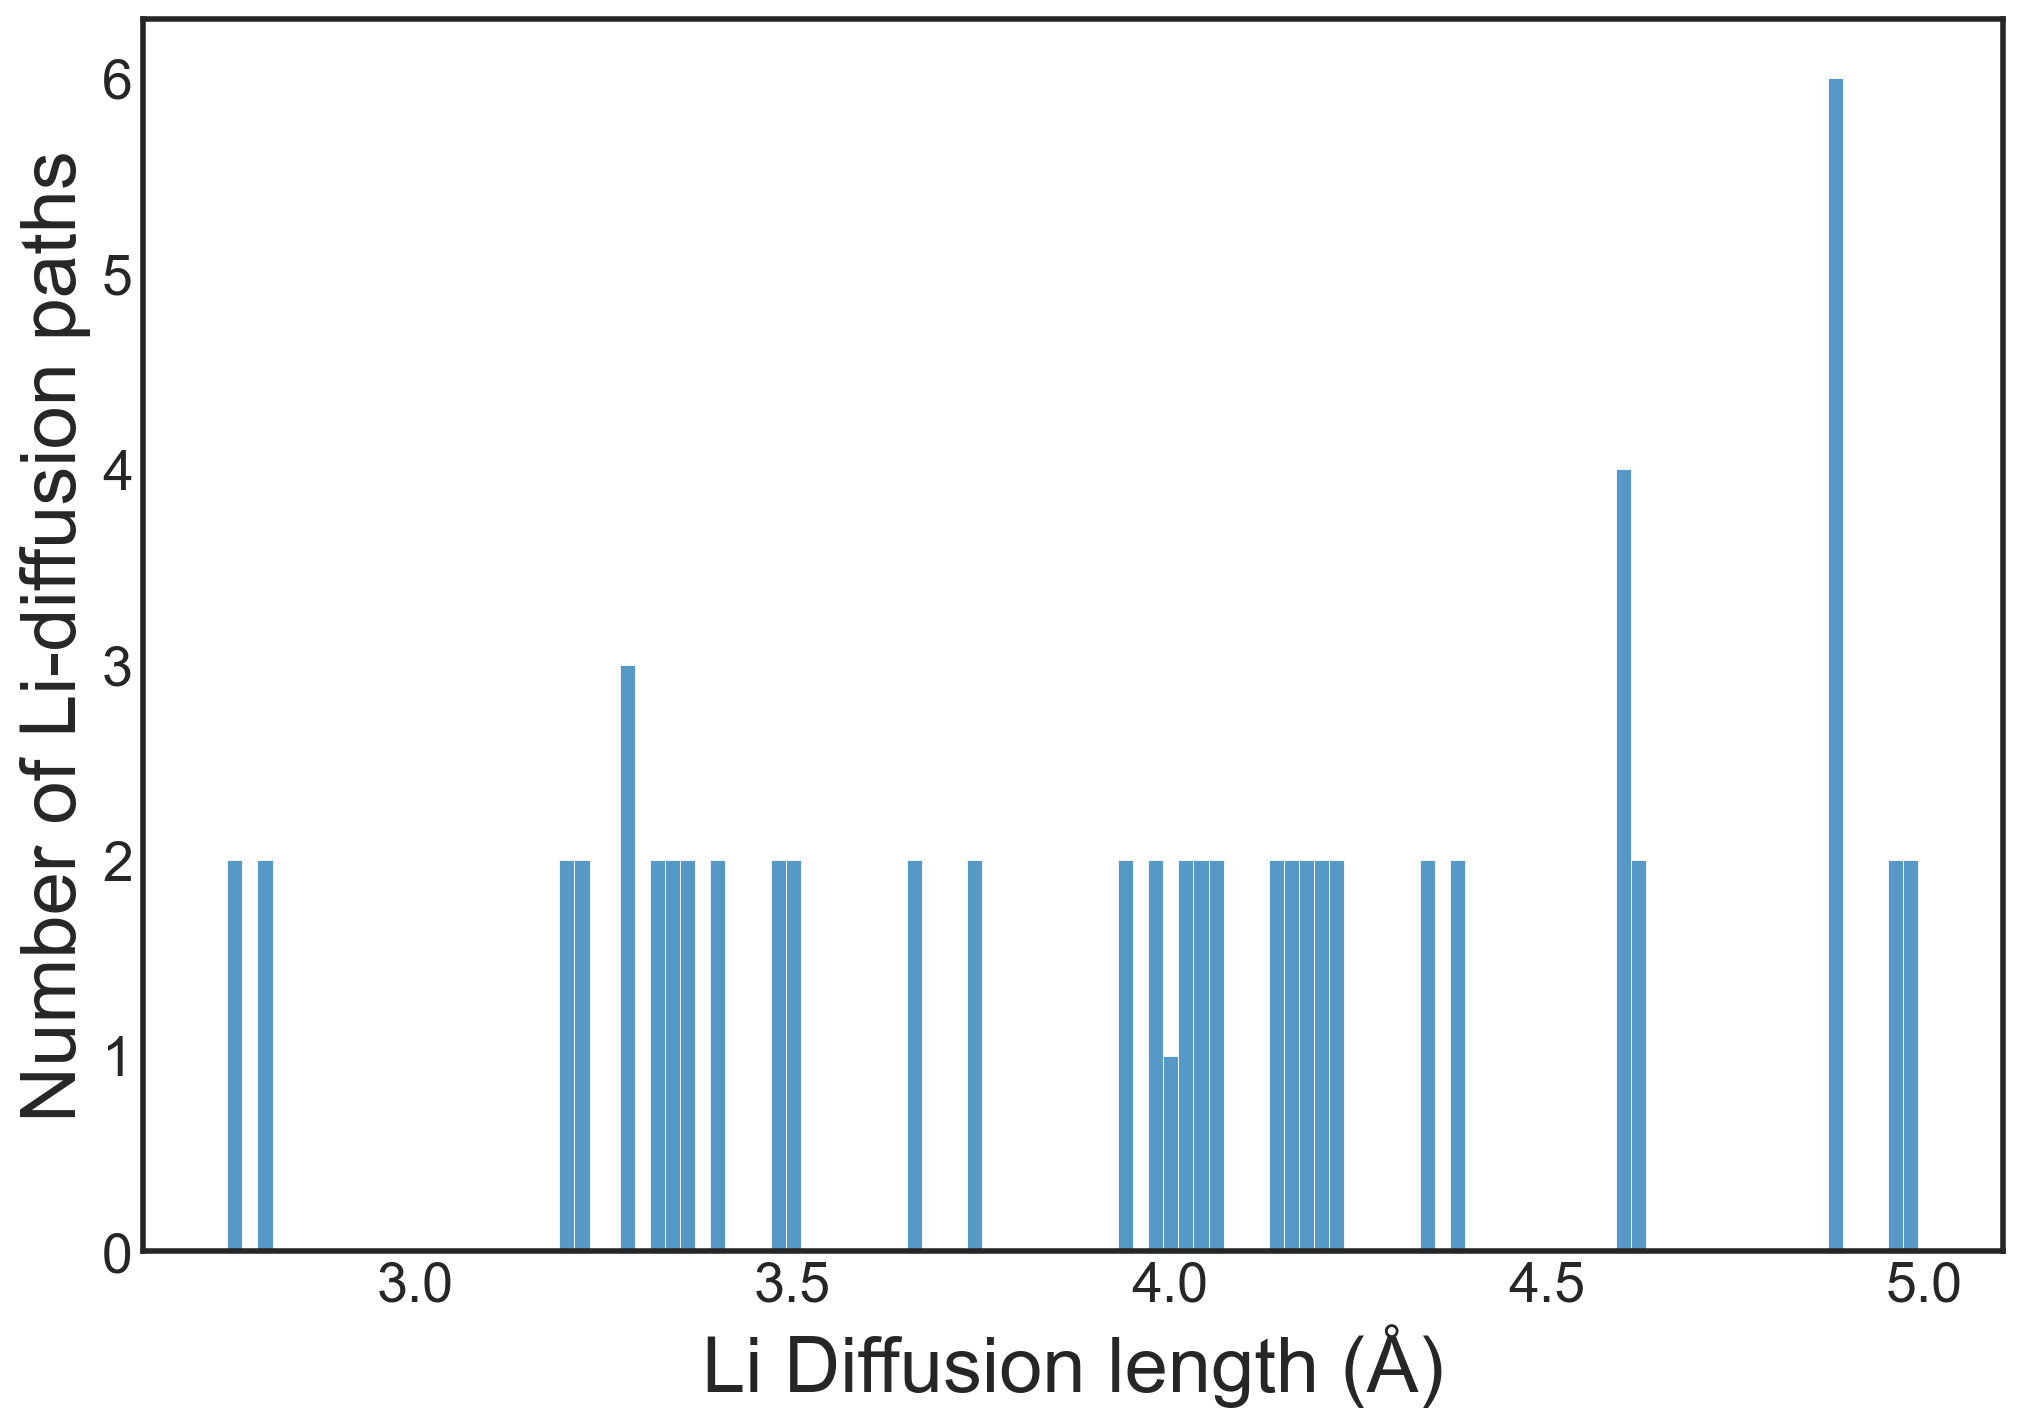

In [28]:
import numpy
df = []
for i, p in enumerate(paths):
        #df[0].append(i)
        df.append(p[2])
        #print(i, p[0], p[1], p[2])
        #print(float(p[2]))
#print(df)
dff = pds.array(df)
for i in dff.argsort():
    print (i, dff[i])

#df
sns.histplot(data=dff, binwidth=0.02)

ax = plt.axes()
#     ax.set_yscale('log')
#     plt.text(0.6, 0.85, "E$_a$ = {:.0f} meV".format(Ea * 1000),
#              fontsize=30, transform=plt.axes().transAxes)
plt.ylabel("Number of Li-diffusion paths",size=28)
plt.xlabel("Li Diffusion length (Å)",size=28)
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
plt.tick_params(direction="in",length=5, width=2)
lgd=plt.legend(bbox_to_anchor=(0.02, 0.03),loc='lower left', borderaxespad=0.,fontsize=20,frameon=False)

plt.savefig('no_of_channel_lpsi_hse_06_mbdnl_light.png', dpi=300, format="png",bbox_inches='tight')
#sns.histplot(data=dff)